# ChurnShield: A Machine Learning Framework for Customer Retention

#### *This project analyzes the Telco customer churn dataset to identify the key drivers of customer churn. The primary goal is to build a machine learning model that can predict which customers are most likely to churn. By understanding the factors that influence customer churn, the telecommunications company can develop targeted strategies to improve customer retention and reduce revenue loss. This project involves data cleaning, exploratory data analysis, feature engineering, and the implementation and evaluation of various classification models to find the most accurate predictor of customer churn.*

### Importing the Library

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)


### *Uploading The Dataset*

In [197]:
df = pd.read_csv('/content/ChurnShield: A Machine Learning Framework for Customer Retention.xls')

### *First five Record in the Dataset*

In [198]:
df.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### *Last Five Recoed in the Dataset*

In [199]:
df.tail(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [201]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [202]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [203]:
# Fill the missing values with the median of the column
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [204]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### *We can see the Structure and Data type of Dataset*

In [205]:
# df.isnull().sum()

In [206]:
# df.info()

### *We use df.describe() to view the summary statistics of the numerical columns in a DataFrame. Normaily*

In [207]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

### *In Graph Wise*

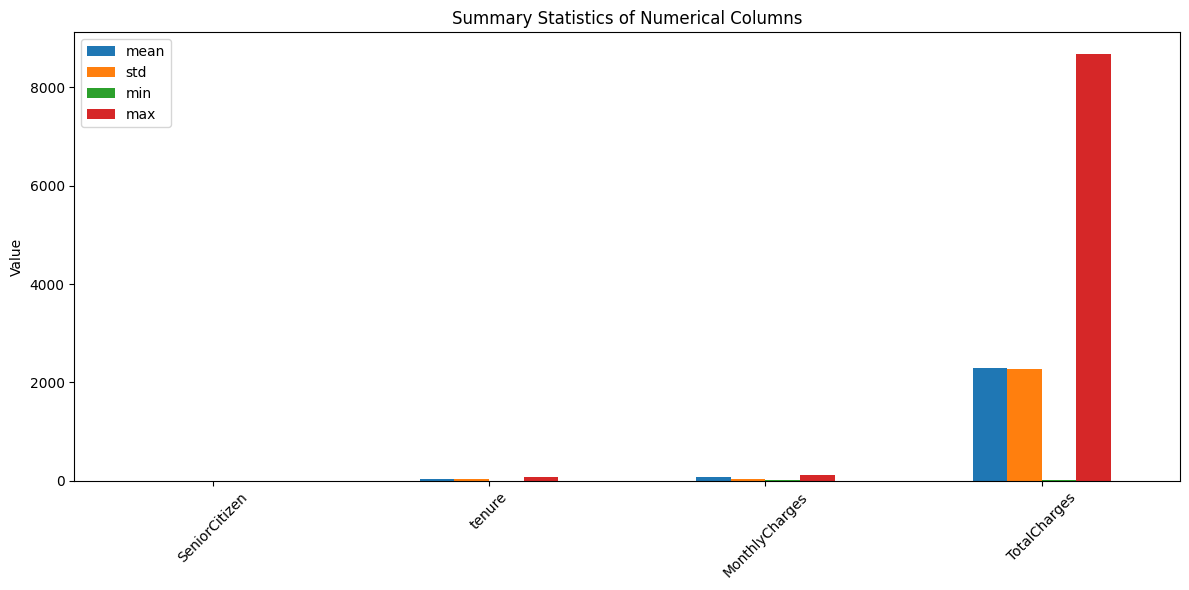

In [208]:
# Get summary statistics
desc = df.describe().transpose()
desc[['mean', 'std', 'min', 'max']].plot(kind='bar', figsize=(12,6))
plt.title('Summary Statistics of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### *We use df.isnull().sum() to check the total number of missing (null) values in each column of the DataFrame.*

In [209]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [210]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### *Detailed Stats (Row-wise View)*

In [211]:
df.describe().transpose()

count         mean          std    min      25%       50%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.000     0.000   
tenure          7043.0    32.371149    24.559481   0.00    9.000    29.000   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.500    70.350   
TotalCharges    7043.0  2281.916928  2265.270398  18.80  402.225  1397.475   

                    75%      max  
SeniorCitizen      0.00     1.00  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

### *All The Columns Name*

In [212]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [213]:
df.shape

(7043, 21)

In [214]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### *Displays all unique values present in the Columns*

In [215]:
df['InternetService'].unique()
df['MonthlyCharges'].unique()
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [216]:
df['InternetService'].value_counts()
df['MonthlyCharges'].value_counts()
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [217]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### *Checking the visualize the distribution and detect outliers.*

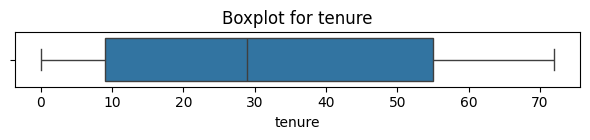

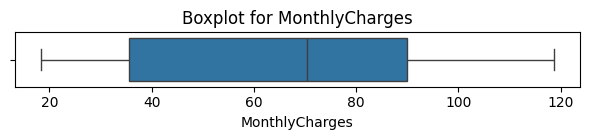

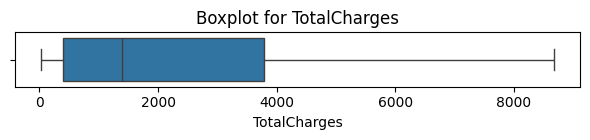

In [218]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()

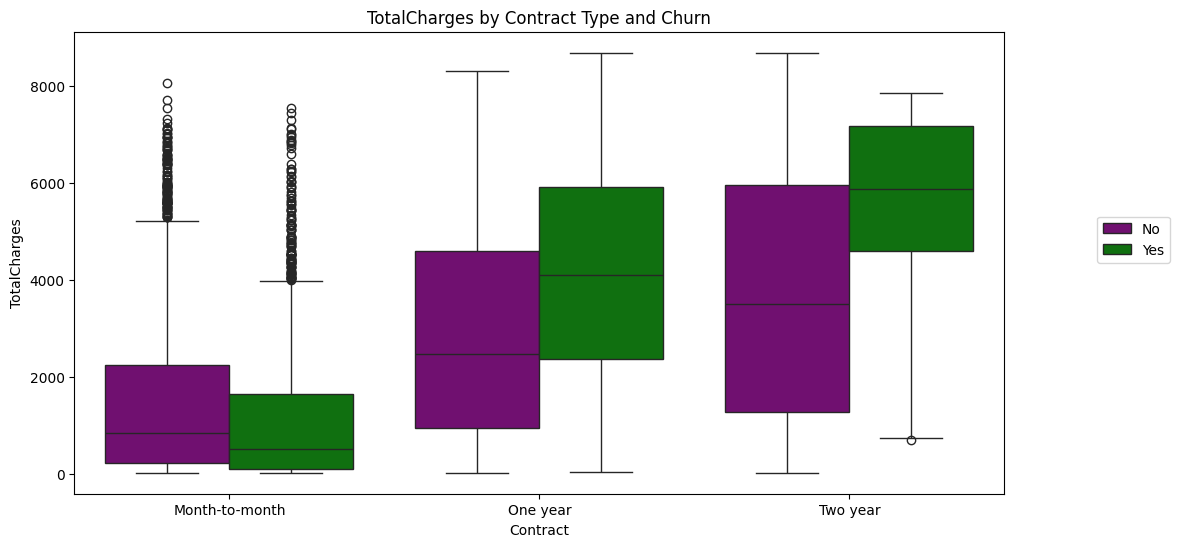

In [219]:
plt.figure(figsize=(12, 6), dpi=100)
sns.boxplot(
    data=df,
    x='Contract',
    y='TotalCharges',
    hue='Churn',
    palette={'Yes': 'green', 'No': 'Purple'}
)
plt.legend(loc=(1.1, 0.5))
plt.title('TotalCharges by Contract Type and Churn')
plt.show()

In [220]:
numeric_cols = df.select_dtypes(include=['number']).columns

# IQR-based outlier detection function
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column} → {len(outliers)} outliers")
    return outliers

# Apply outlier detection to all numeric columns
for col in numeric_cols:
    detect_outliers_iqr(df, col)


SeniorCitizen → 1142 outliers
tenure → 0 outliers
MonthlyCharges → 0 outliers
TotalCharges → 0 outliers


In [221]:
# df.isnull().sum()

### *Visualizing Churn Distribution (Yes vs No)*

<Axes: xlabel='Churn', ylabel='count'>

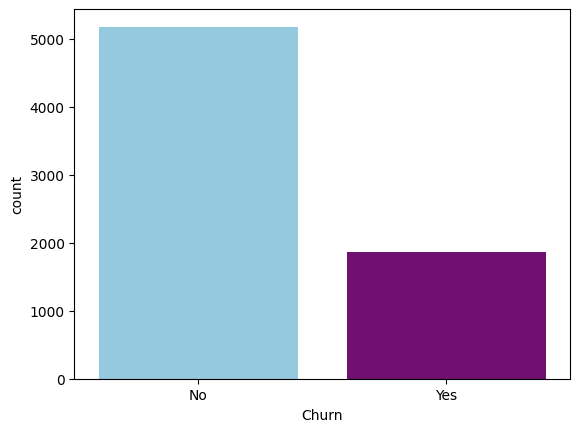

In [222]:
sns.countplot(data=df, x='Churn', palette={'Yes': 'purple', 'No': 'skyblue'})

### *Pairwise Relationships by Churn Status*

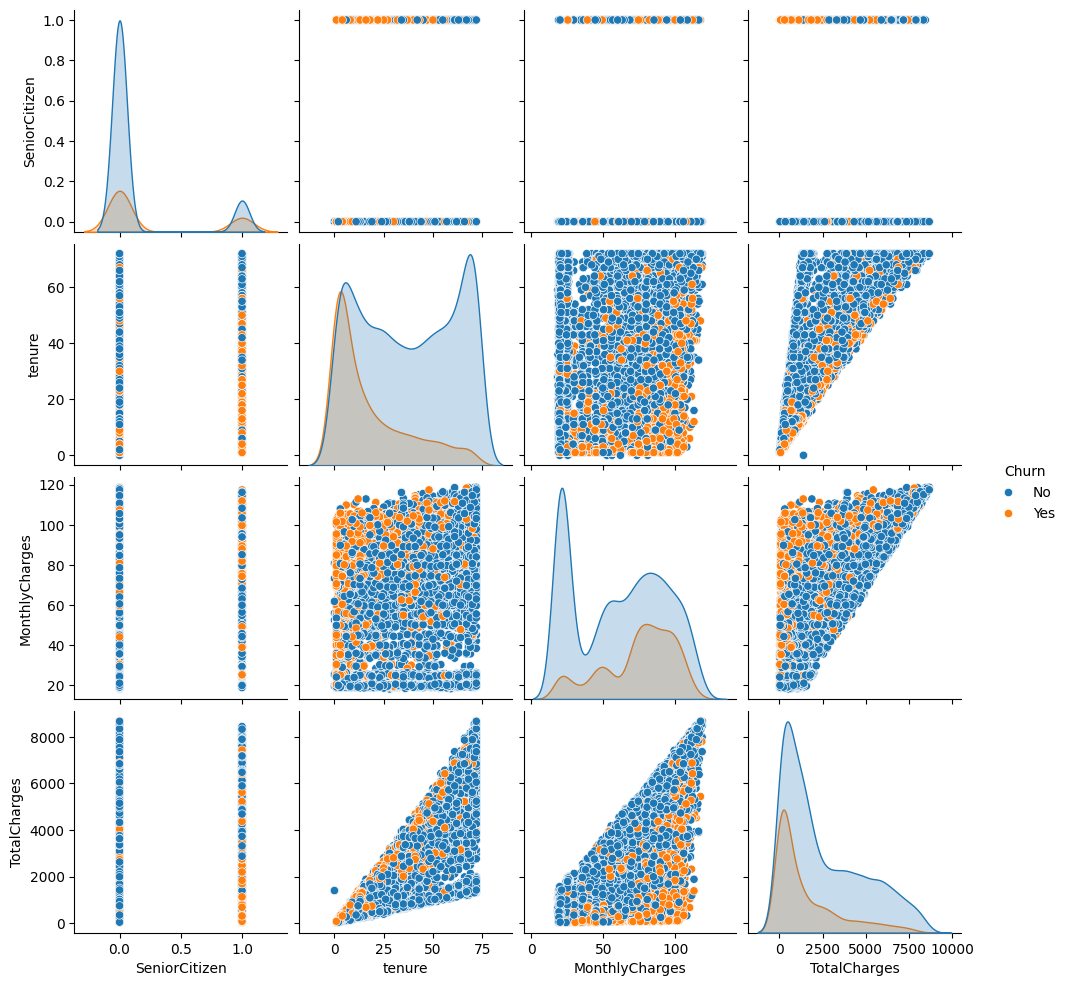

In [223]:
sns.pairplot(data=df,hue='Churn')

### *CUSTOMER WITH 1 OR 2 YEARS CONTRACTS WHO CHURNED TEND TO HAVE NOTICEABLY HIGHER TOTAL CHARGES COMPARED TO THESE WHO STAY.*


*THEN THE COMPANY HAS TO THINK OF A SOLUTION TO TRY AND REDUCE THESE CHARGES TO TRY AND KEEP THE CUSTOMERS...SOMETHING LIKE DISCOUNT COUPONS OR LOYALTY DISCOUNT.*

# *EXPLORATORY DATA ANALYSIS:*

### *One-Hot Encoding for Categorical Features*

In [224]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService',
                             'MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
                             'InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                             'PaymentMethod','Churn']])
# We dont use drop_first=True here just for the sake of the visualiztion, plus it didnt cause ay problems here.
# Other times we can drop it.

SeniorCitizen  gender_Female  gender_Male  Partner_No  Partner_Yes  \
0                 0           True        False       False         True   
1                 0          False         True        True        False   
2                 0          False         True        True        False   
3                 0          False         True        True        False   
4                 0           True        False        True        False   
...             ...            ...          ...         ...          ...   
7038              0          False         True       False         True   
7039              0           True        False       False         True   
7040              0           True        False       False         True   
7041              1          False         True       False         True   
7042              0          False         True        True        False   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0              True           False             True             False   
1              True           False            False              True   
2              True           False            False              True   
3              True           False             True             False   
4              True           False            False              True   
...             ...             ...              ...               ...   
7038          False            True            False              True   
7039          False            True            False              True   
7040          False            True             True             False   
7041           True           False            False              True   
7042           True           False            False              True   

      MultipleLines_No  ...  Contract_One year  Contract_Two year  \
0                False  ...              False              False   
1                 True  ...               True              False   
2                 True  ...              False              False   
3                False  ...               True              False   
4                 True  ...              False              False   
...                ...  ...                ...                ...   
7038             False  ...               True              False   
7039             False  ...               True              False   
7040             False  ...              False              False   
7041             False  ...              False              False   
7042              True  ...              False               True   

      PaperlessBilling_No  PaperlessBilling_Yes  \
0                   False                  True   
1                    True                 False   
2                   False                  True   
3                    True                 False   
4                   False                  True   
...                   ...                   ...   
7038                False                  True   
7039                False                  True   
7040                False                  True   
7041                False                  True   
7042                False                  True   

      PaymentMethod_Bank transfer (automatic)  \
0                                       False   
1                                       False   
2                                       False   
3                                        True   
4                                       False   
...                                       ...   
7038                                    False   
7039                                    False   
7040                                    False   
7041                                    False   
7042                                     True   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                     False                            True   
1              

In [225]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService',
                             'MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
                             'InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                             'PaymentMethod','Churn']]).corr()

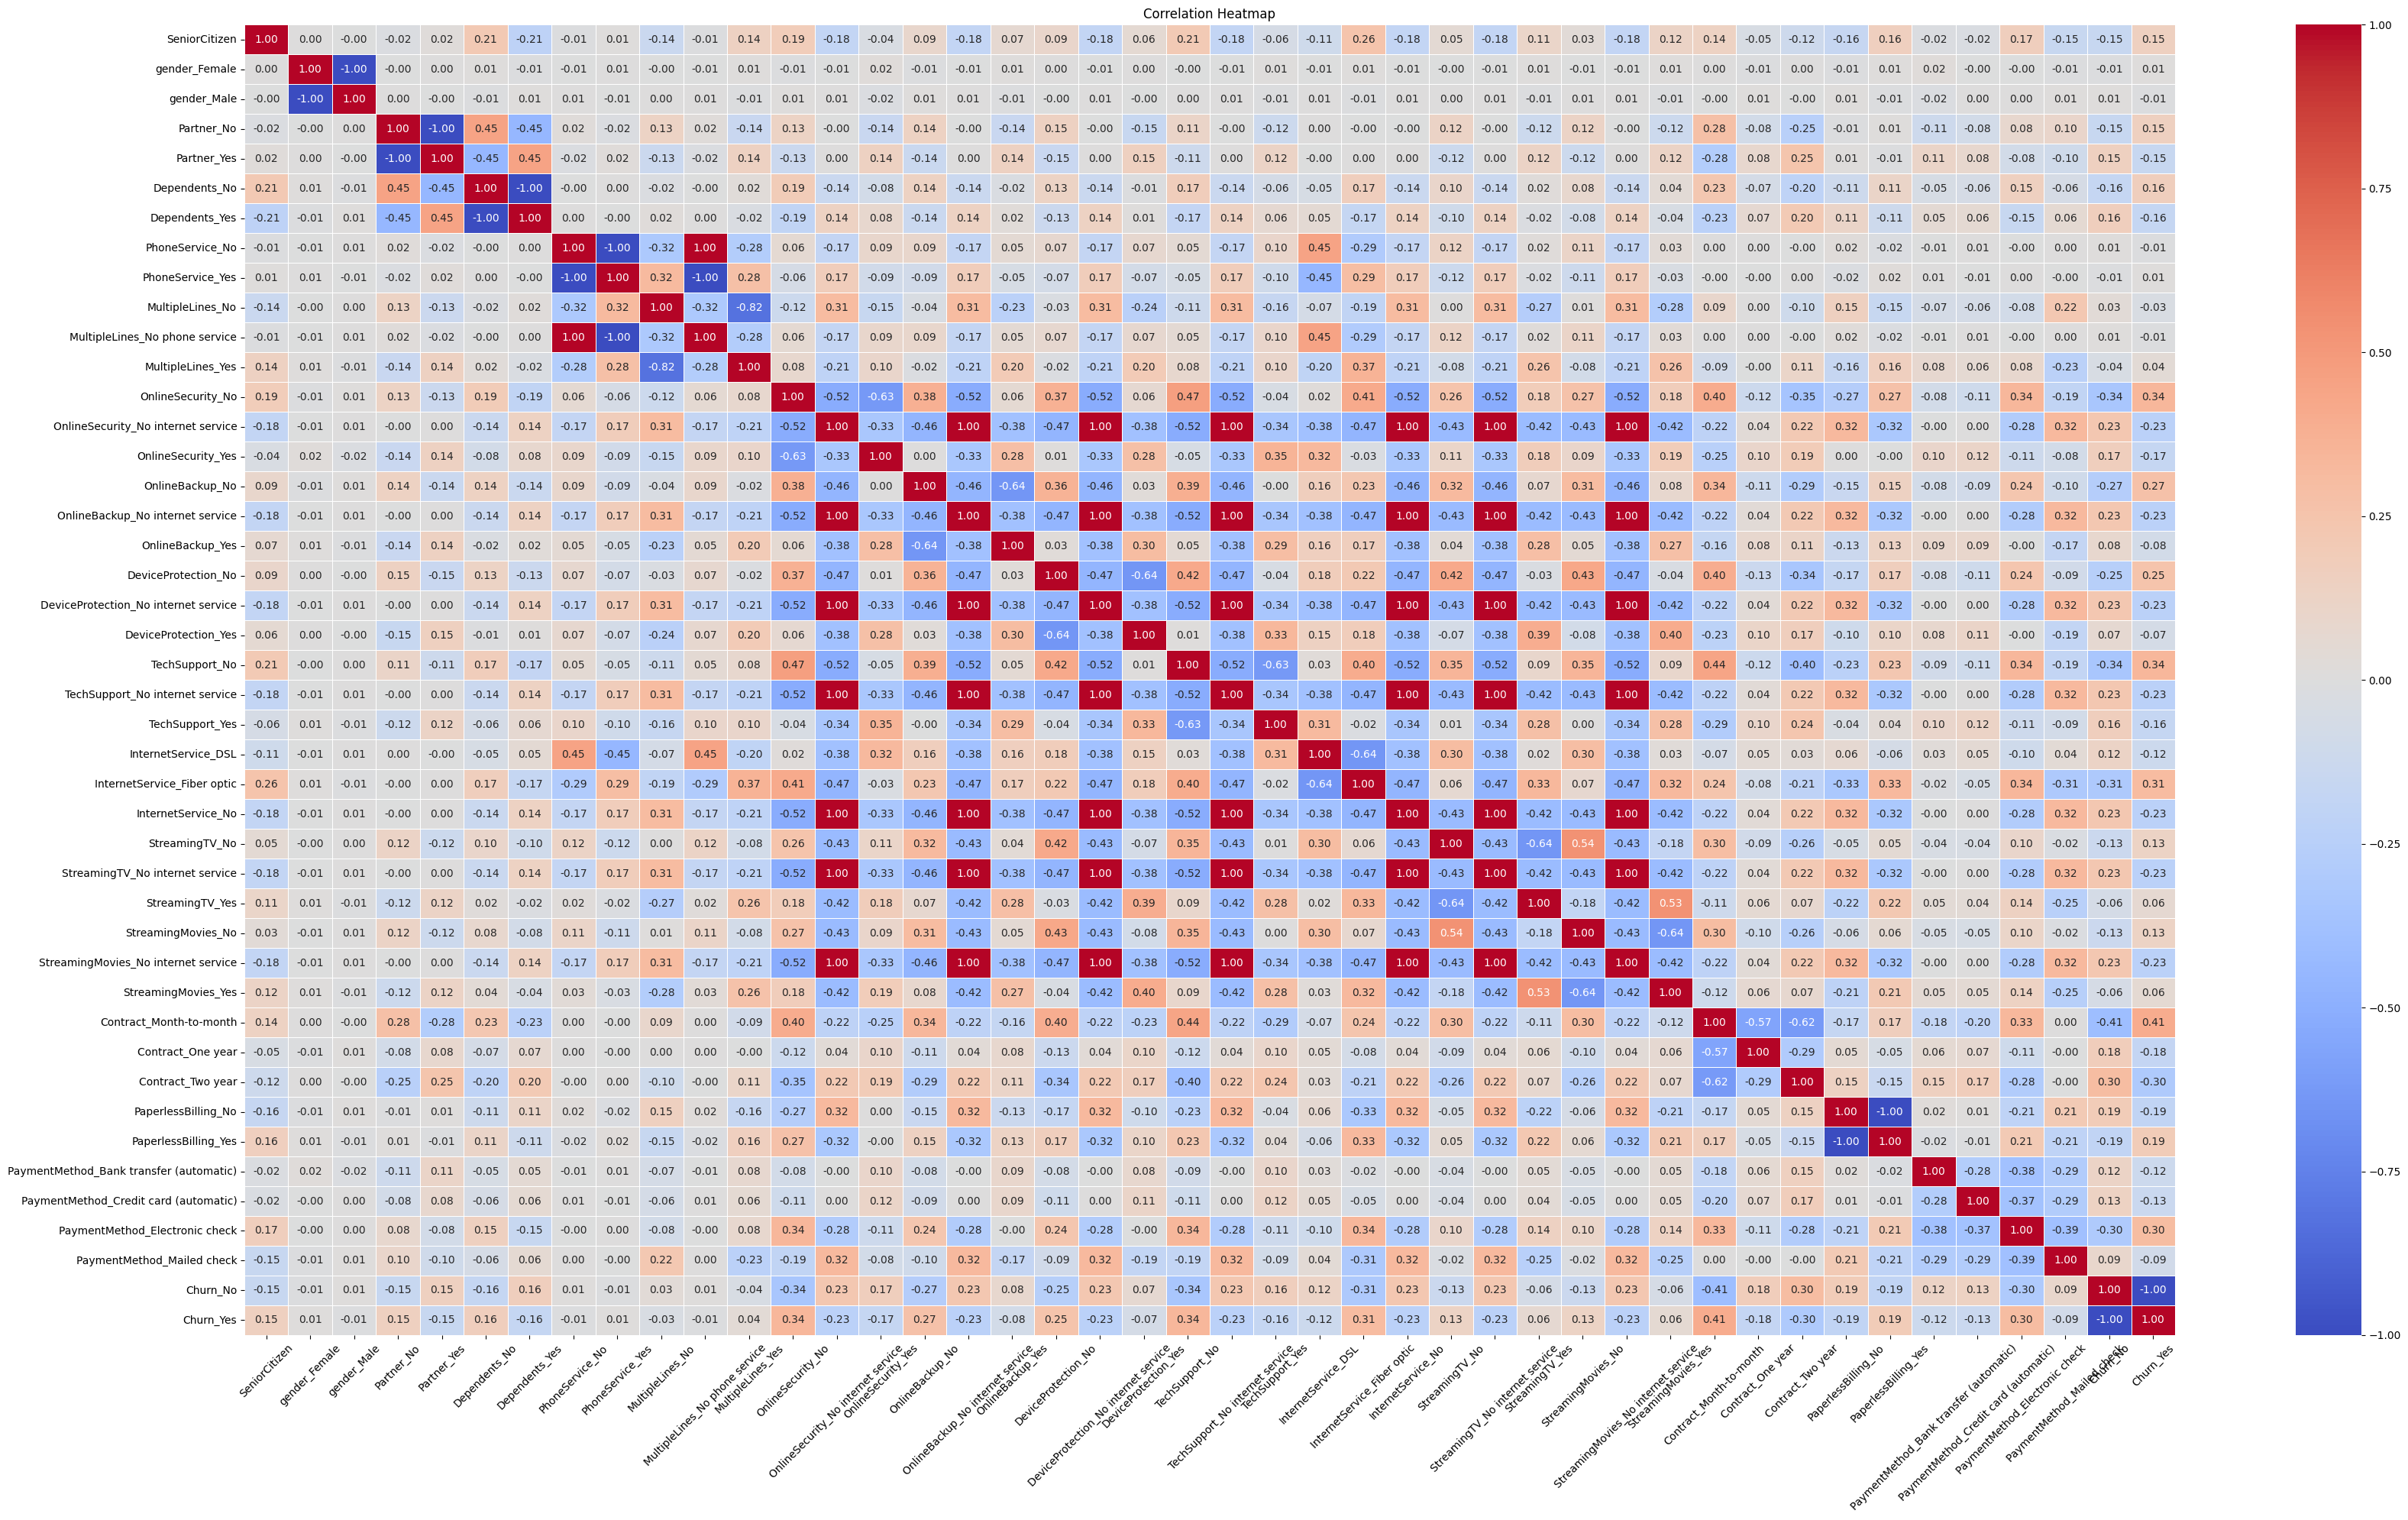

In [226]:
plt.figure(figsize=(35, 20))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [227]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values(ascending=False).iloc[1:-1]
#go from 1 to penultimate element while not considering the first element at index=0 and last element.

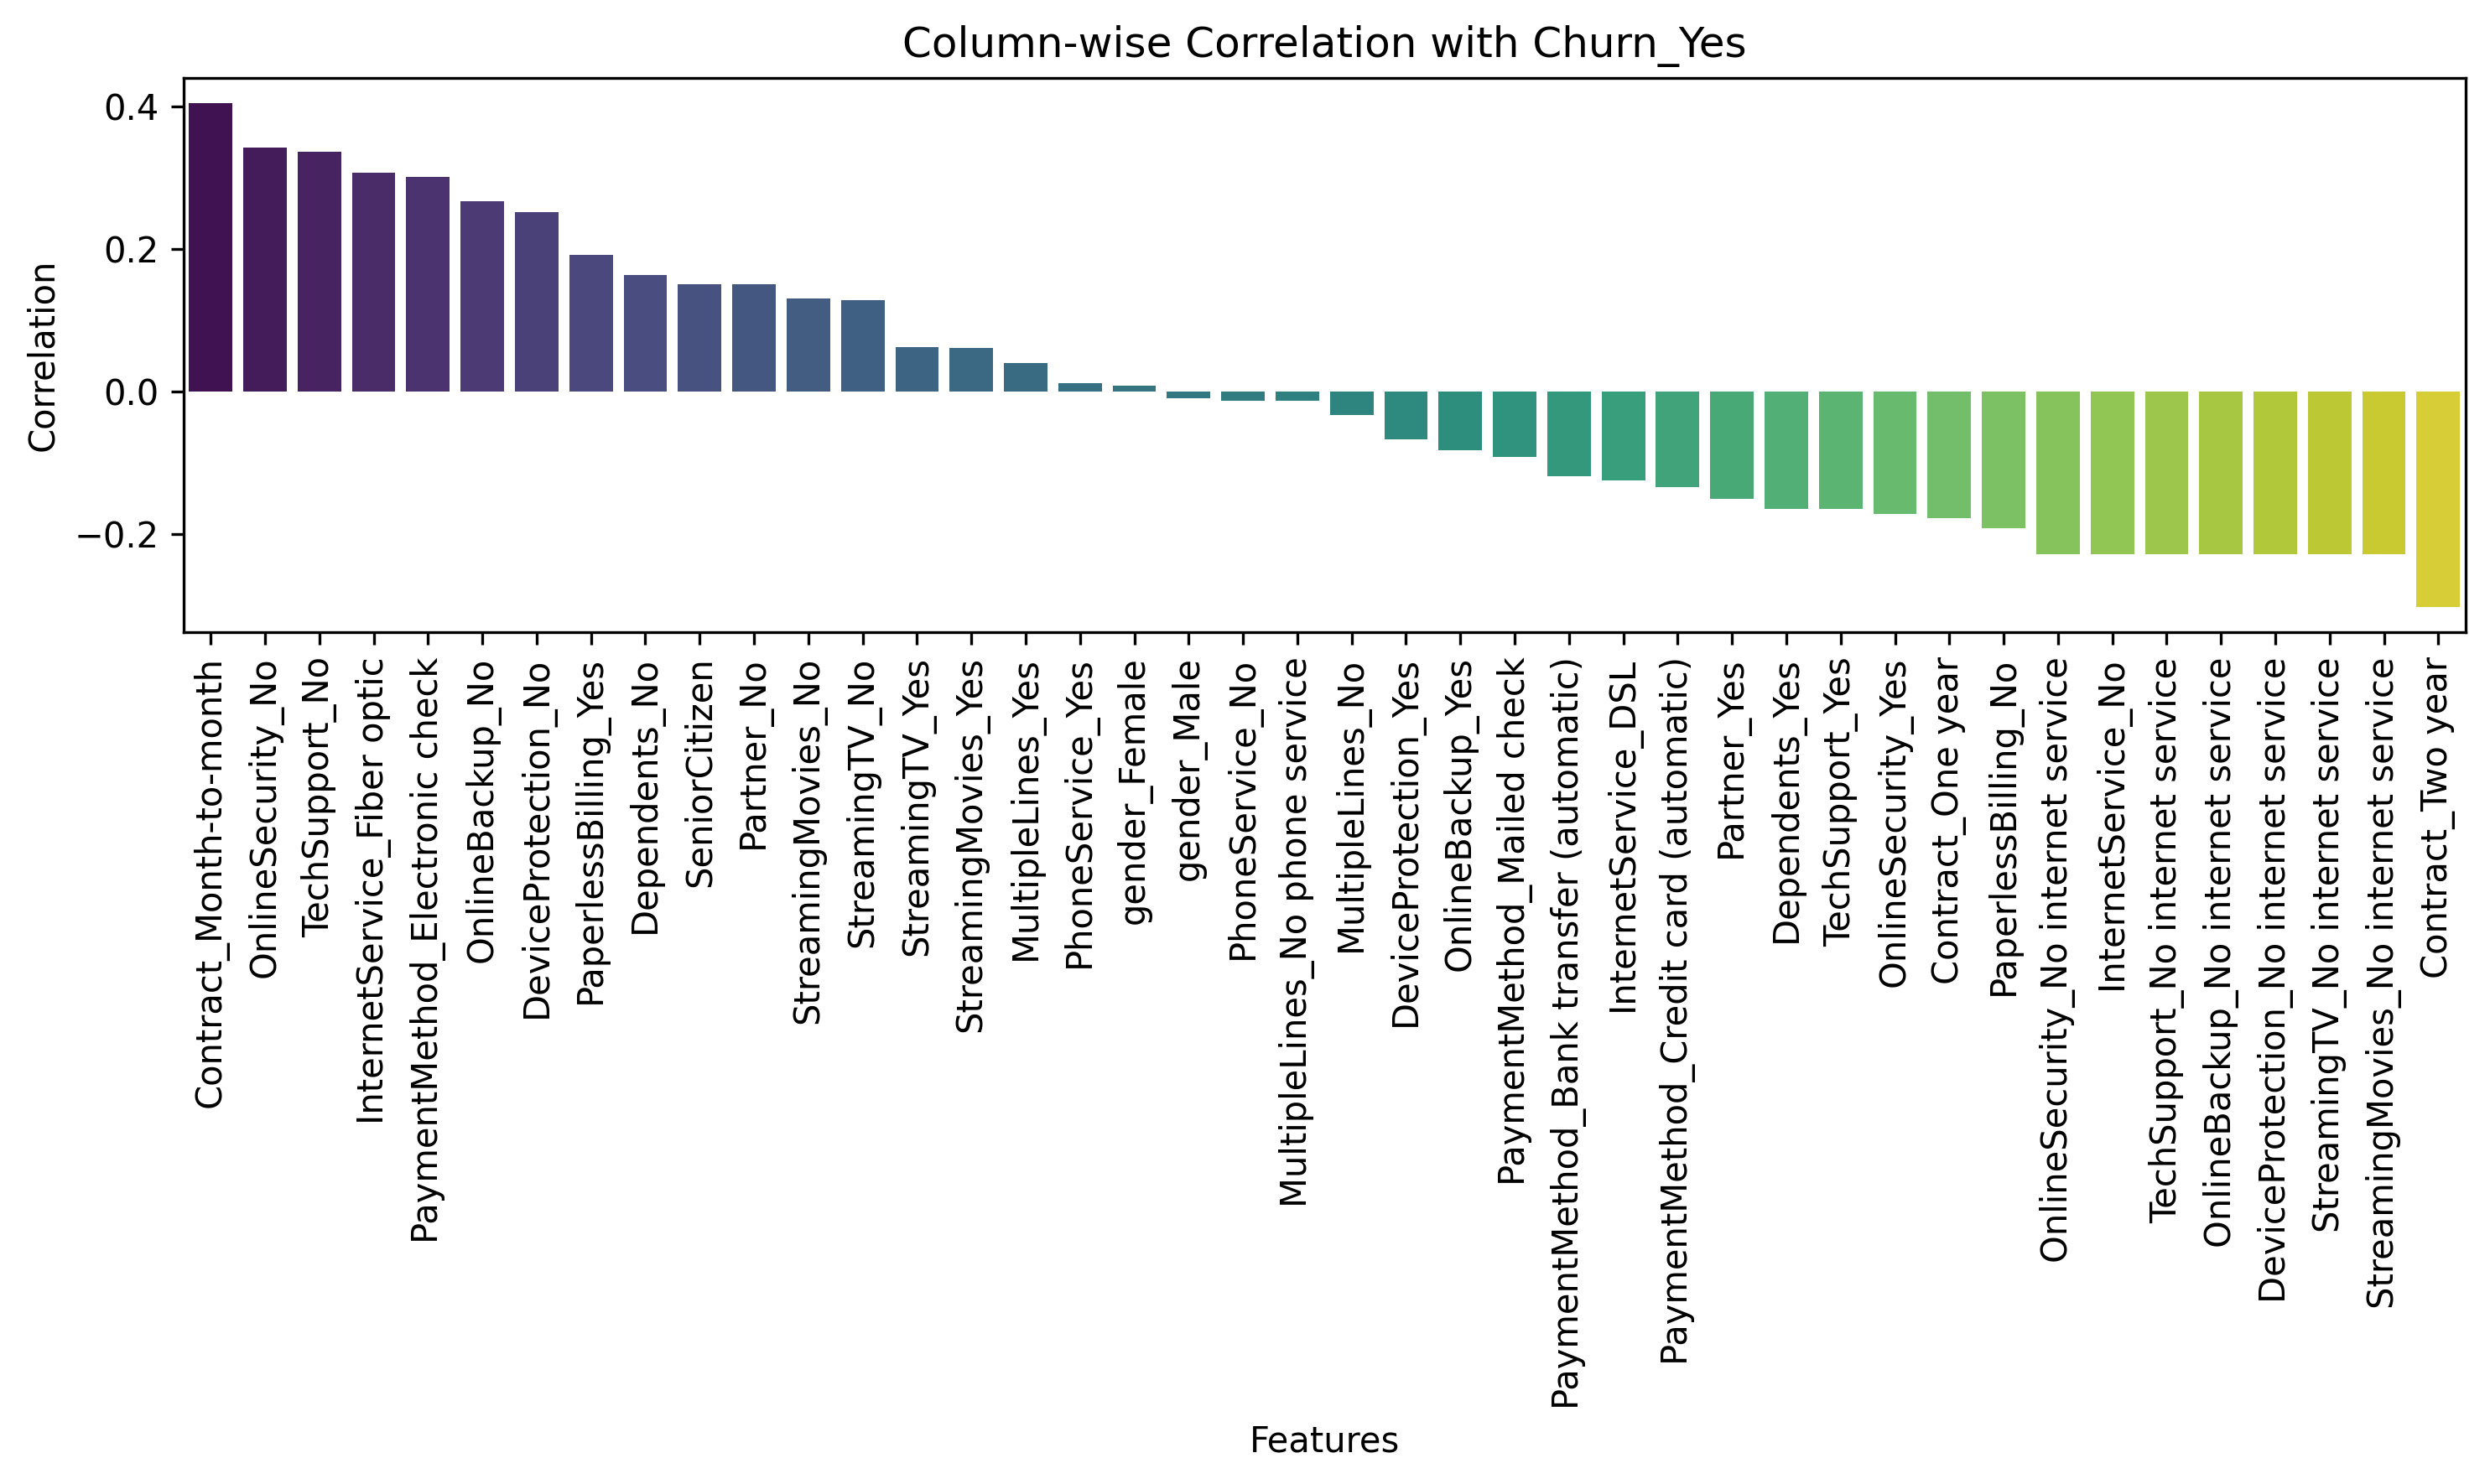

In [228]:
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn, palette='viridis')  # optional color palette
plt.title('Column-wise Correlation with Churn_Yes')
plt.xticks(rotation=90)
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [229]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

### *The graph clearly shows that features with a positive correlation increase the likelihood of customer churn, while those with a negative correlation decrease it.*

In [230]:
df.shape

(7043, 21)

# *CHURN ANALYSIS*

In [231]:
df[['PhoneService', 'Contract', 'Churn']].value_counts().reset_index(name='Count')

PhoneService        Contract Churn  Count
0           Yes  Month-to-month    No   1997
1           Yes  Month-to-month   Yes   1502
2           Yes        Two year    No   1489
3           Yes        One year    No   1176
4            No  Month-to-month    No    223
5            No        Two year    No    158
6            No  Month-to-month   Yes    153
7           Yes        One year   Yes    152
8            No        One year    No    131
9           Yes        Two year   Yes     45
10           No        One year   Yes     14
11           No        Two year   Yes      3

In [232]:
df['tenure'].unique() # To see all the diff. tenure lengths

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

<Axes: xlabel='tenure', ylabel='Count'>

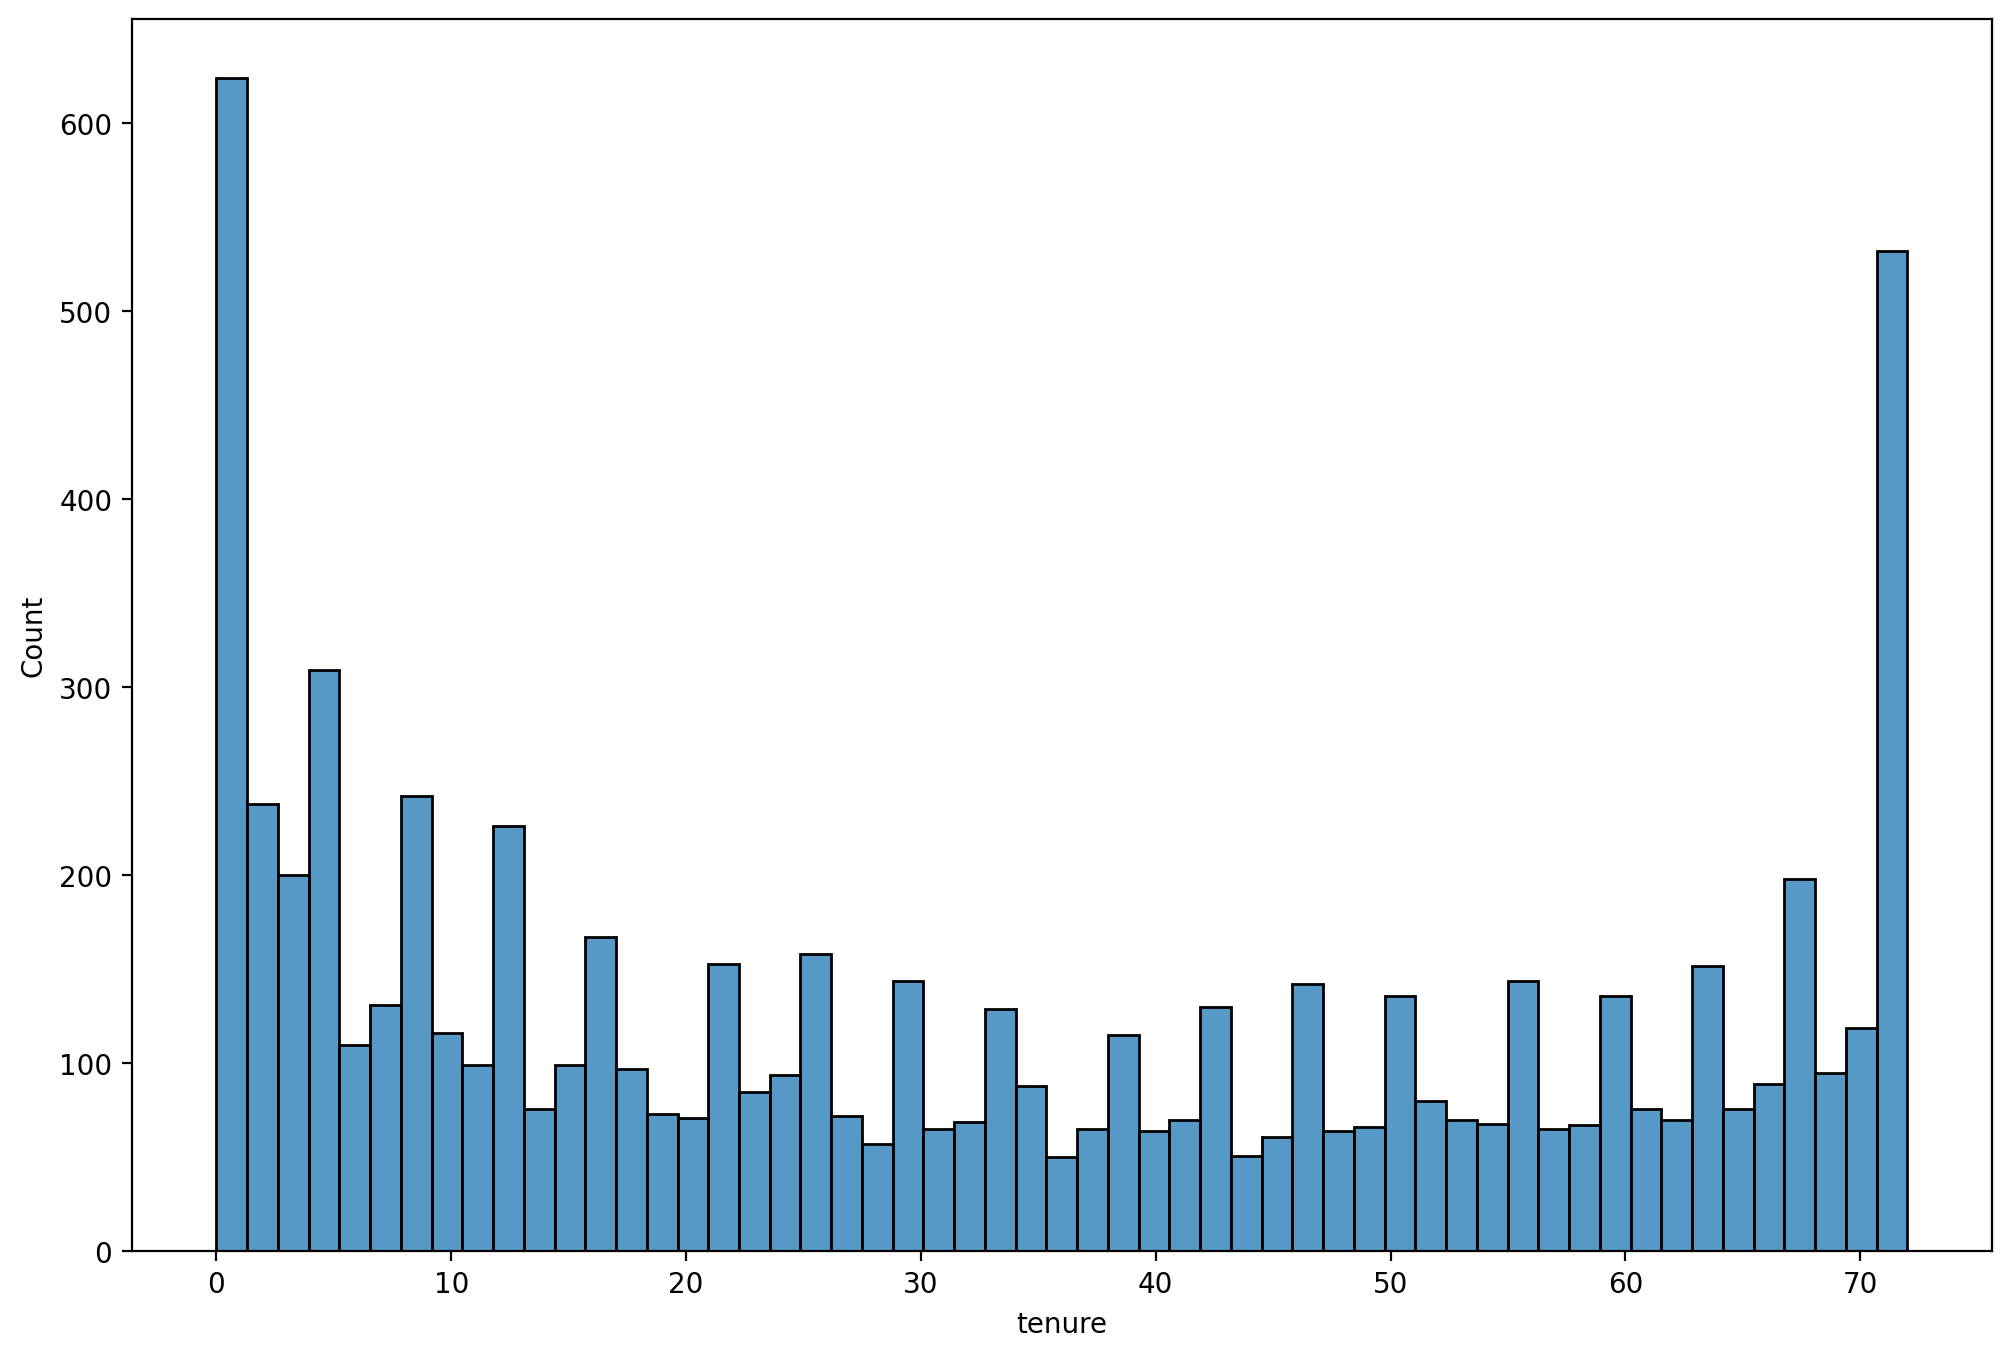

In [233]:
# Visualising the tenure DISTRIBUTION/spreadness:
plt.figure(figsize=(12,8),dpi=200)
sns.histplot(data=df,x='tenure',bins=55)

<Figure size 2000x800 with 0 Axes>

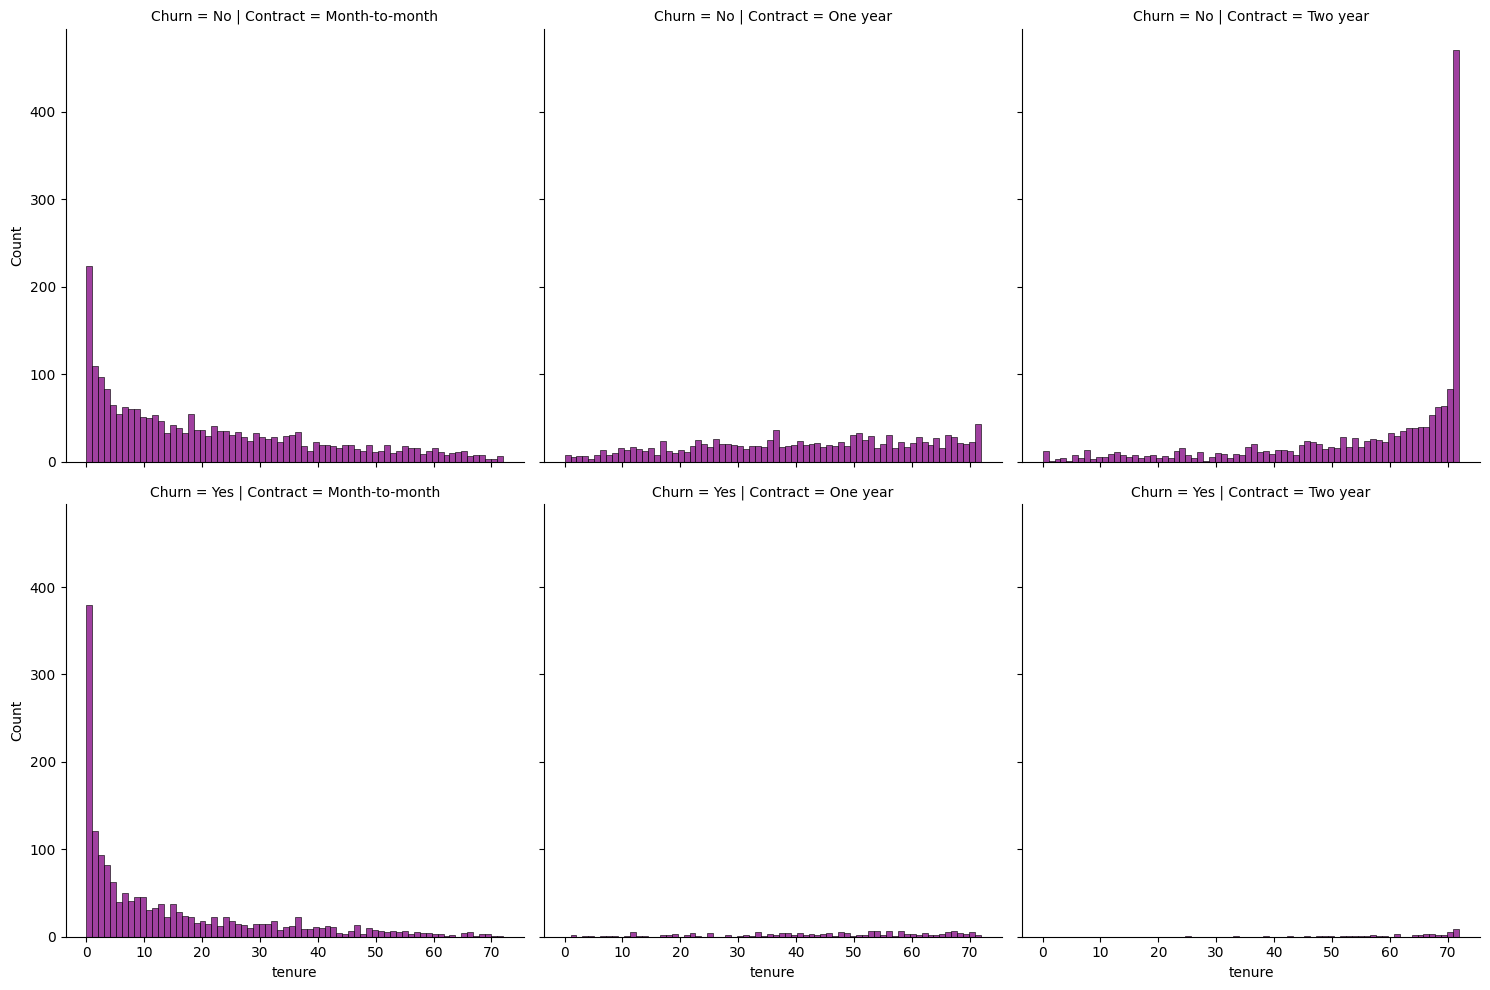

In [234]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=df,x='tenure',col='Contract',row='Churn',color = 'Purple', bins=70)

### INFERENCE OF GRAPHS(Displot):
- **MONTH-TO-MONTH: The bottom left graph shows how most people with a month-to-month contract churn(leave) only after a few months.**
- **YEARLY: The people with one-year contracts stay pretty consistent.**
- **TWO-YEAR: We see that most people DO NOT churn after 2 years because the service might be a necessity to them and/or they are satisfied with the service.**

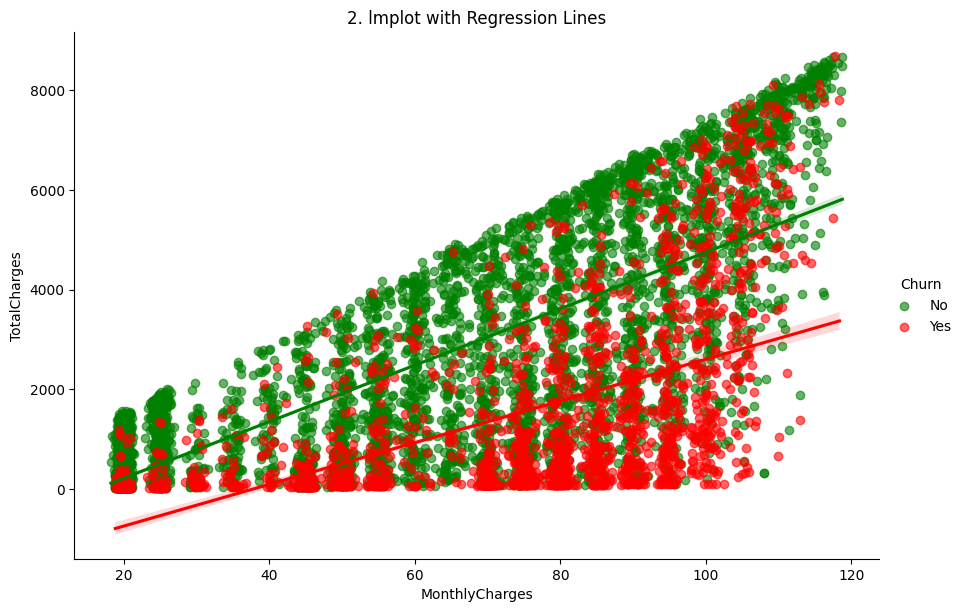

In [235]:
sns.lmplot(
    data=df,
    x='MonthlyCharges',
    y='TotalCharges',
    hue='Churn',
    palette={'Yes': 'red', 'No': 'green'},
    height=6,
    aspect=1.5,
    scatter_kws={'alpha':0.6}
)
plt.title("2. lmplot with Regression Lines")
plt.show()

### SCATTERPLOT INTERPRETATION:
- **Customers tend to churn way more when their monthly charges are high.**
- **The company is still not THAT worried because there are still many customers paying the same monthly charges whose total charges are WAY MORE and they are NOT churning.**

## COHORT ANALYSIS:
- **Cohort means grouping similar people/customers together.**
- **Here, we will treat every month from 1 to N as its own cohort and then calculate the churn percentage aka the % of people who churned.**

In [236]:
df.groupby(['Churn','tenure']).count().transpose()
#shows us the number of people who churned/didn't churn w.r.t the no. of months of their tenure.

Churn             No                                         ... Yes        \
tenure            0    1    2    3   4   5   6   7   8   9   ...  63 64 65   
customerID        11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
gender            11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
SeniorCitizen     11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
Partner           11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
Dependents        11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
PhoneService      11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
MultipleLines     11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
InternetService   11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
OnlineSecurity    11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
OnlineBackup      11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
DeviceProtection  11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
TechSupport       11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
StreamingTV       11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
StreamingMovies   11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
Contract          11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
PaperlessBilling  11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
PaymentMethod     11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
MonthlyCharges    11  233  115  106  93  69  70  80  81  73  ...   4  4  9   
TotalCharges      11  233  115  106  93  69  70  80  81  73  ...   4  4  9   

Churn                                     
tenure            66  67 68 69  70 71 72  
customerID        13  10  9  8  11  6  6  
gender            13  10  9  8  11  6  6  
SeniorCitizen     13  10  9  8  11  6  6  
Partner           13  10  9  8  11  6  6  
Dependents        13  10  9  8  11  6  6  
PhoneService      13  10  9  8  11  6  6  
MultipleLines     13  10  9  8  11  6  6  
InternetService   13  10  9  8  11  6  6  
OnlineSecurity    13  10  9  8  11  6  6  
OnlineBackup      13  10  9  8  11  6  6  
DeviceProtection  13  10  9  8  11  6  6  
TechSupport       13  10  9  8  11  6  6  
StreamingTV       13  10  9  8  11  6  6  
StreamingMovies   13  10  9  8  11  6  6  
Contract          13  10  9  8  11  6  6  
PaperlessBilling  13  10  9  8  11  6  6  
PaymentMethod     13  10  9  8  11  6  6  
MonthlyCharges    13  10  9  8  11  6  6  
TotalCharges      13  10  9  8  11  6  6  

[19 rows x 145 columns]

In [237]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [238]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [239]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [240]:
yes_churn.head()

tenure          1    2   3   4   5   6   7   8   9   10  ...  63  64  65  66  \
customerID     380  123  94  83  64  40  51  42  46  45  ...   4   4   9  13   
gender         380  123  94  83  64  40  51  42  46  45  ...   4   4   9  13   
SeniorCitizen  380  123  94  83  64  40  51  42  46  45  ...   4   4   9  13   
Partner        380  123  94  83  64  40  51  42  46  45  ...   4   4   9  13   
Dependents     380  123  94  83  64  40  51  42  46  45  ...   4   4   9  13   

tenure         67  68  69  70  71  72  
customerID     10   9   8  11   6   6  
gender         10   9   8  11   6   6  
SeniorCitizen  10   9   8  11   6   6  
Partner        10   9   8  11   6   6  
Dependents     10   9   8  11   6   6  

[5 rows x 72 columns]

In [244]:
df_backup = df.copy()  # Save original
df = df.loc[:, (df != 0).any(axis=0)]  # Then modify

In [245]:
yes_churn.isnull().sum()

tenure
1     0
2     0
3     0
4     0
5     0
     ..
68    0
69    0
70    0
71    0
72    0
Length: 72, dtype: int64

In [246]:
churn_rate = 100*yes_churn / (no_churn+yes_churn)

In [247]:
churn_rate

tenure            0          1          2     3          4          5   \
customerID       NaN  61.990212  51.680672  47.0  47.159091  48.120301   
gender           NaN  61.990212  51.680672  47.0  47.159091  48.120301   
SeniorCitizen    NaN  61.990212  51.680672  47.0  47.159091  48.120301   
Partner          NaN  61.990212  51.680672  47.0  47.159091  48.120301   
Dependents       NaN  61.990212  51.680672  47.0  47.159091  48.120301   
PhoneService     NaN  61.990212  51.680672  47.0  47.159091  48.120301   
MultipleLines    NaN  61.990212  51.680672  47.0  47.159091  48.120301   
InternetService  NaN  61.990212  51.680672  47.0  47.159091  48.120301   
OnlineSecurity   NaN  61.990212  51.680672  47.0  47.159091  48.120301   
OnlineBackup     NaN  61.990212  51.680672  47.0  47.159091  48.120301   
DeviceProtection NaN  61.990212  51.680672  47.0  47.159091  48.120301   
TechSupport      NaN  61.990212  51.680672  47.0  47.159091  48.120301   
StreamingTV      NaN  61.990212  51.680672  47.0  47.159091  48.120301   
StreamingMovies  NaN  61.990212  51.680672  47.0  47.159091  48.120301   
Contract         NaN  61.990212  51.680672  47.0  47.159091  48.120301   
PaperlessBilling NaN  61.990212  51.680672  47.0  47.159091  48.120301   
PaymentMethod    NaN  61.990212  51.680672  47.0  47.159091  48.120301   
MonthlyCharges   NaN  61.990212  51.680672  47.0  47.159091  48.120301   
TotalCharges     NaN  61.990212  51.680672  47.0  47.159091  48.120301   

tenure                   6          7          8          9   ...        63  \
customerID        36.363636  38.931298  34.146341  38.655462  ...  5.555556   
gender            36.363636  38.931298  34.146341  38.655462  ...  5.555556   
SeniorCitizen     36.363636  38.931298  34.146341  38.655462  ...  5.555556   
Partner           36.363636  38.931298  34.146341  38.655462  ...  5.555556   
Dependents        36.363636  38.931298  34.146341  38.655462  ...  5.555556   
PhoneService      36.363636  38.931298  34.146341  38.655462  ...  5.555556   
MultipleLines     36.363636  38.931298  34.146341  38.655462  ...  5.555556   
InternetService   36.363636  38.931298  34.146341  38.655462  ...  5.555556   
OnlineSecurity    36.363636  38.931298  34.146341  38.655462  ...  5.555556   
OnlineBackup      36.363636  38.931298  34.146341  38.655462  ...  5.555556   
DeviceProtection  36.363636  38.931298  34.146341  38.655462  ...  5.555556   
TechSupport       36.363636  38.931298  34.146341  38.655462  ...  5.555556   
StreamingTV       36.363636  38.931298  34.146341  38.655462  ...  5.555556   
StreamingMovies   36.363636  38.931298  34.146341  38.655462  ...  5.555556   
Contract          36.363636  38.931298  34.146341  38.655462  ...  5.555556   
PaperlessBilling  36.363636  38.931298  34.146341  38.655462  ...  5.555556   
PaymentMethod     36.363636  38.931298  34.146341  38.655462  ...  5.555556   
MonthlyCharges    36.363636  38.931298  34.146341  38.655462  ...  5.555556   
TotalCharges      36.363636  38.931298  34.146341  38.655462  ...  5.555556   

tenure             64         65         66         67   68        69  \
customerID        5.0  11.842105  14.606742  10.204082  9.0  8.421053   
gender            5.0  11.842105  14.606742  10.204082  9.0  8.421053   
SeniorCitizen     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Partner           5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Dependents        5.0  11.842105  14.606742  10.204082  9.0  8.421053   
PhoneService      5.0  11.842105  14.606742  10.204082  9.0  8.421053   
MultipleLines     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
InternetService   5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineSecurity    5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineBackup      5.0  11.842105  14.606742  10.204082  9.0  8.421053   
DeviceProtection  5.0  11.842105  14.606742  10.204082  9.0  8.421053   
TechSupport       5.0  11.842105  14.606742  10.204082  9.0  8

In [248]:
#GIVES US CHURN RATE IN % W.R.T THE TENURE(NO. OF MONTHS)
churn_rate.transpose()['customerID']
# we only choose one column because all these values are repeating multiple times and we need them only once.

tenure
0           NaN
1     61.990212
2     51.680672
3     47.000000
4     47.159091
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 73, dtype: float64

<Axes: ylabel='Frequency'>

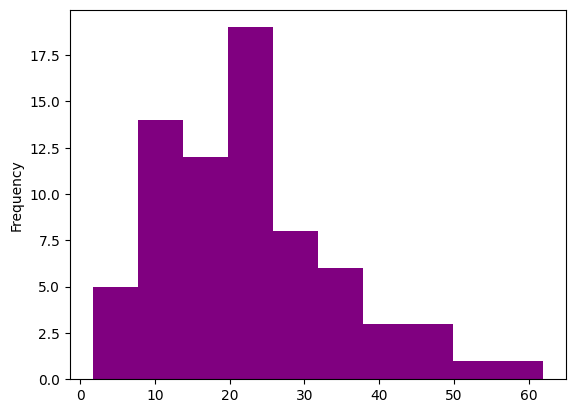

In [249]:
churn_rate.transpose()['customerID'].plot(kind='hist', color = 'purple')


### LINE PLOT INSIGHTS:
- **Customers with shorter contract durations are far more likely to churn compared to those with longer-term contracts. This makes sense, as the longer someone stays with a service, the less likely they are to leave.**
***
### COHORT GROUPING STRATEGY:
- **In practice, companies rarely create cohorts for every single tenure value. Instead, they group customers into broader categories or clusters for better analysis.**

- **For Example: '0-12 MONTHS' ; '12-24 MONTHS' ; '24-28 MONTHS' ; 'OVER 48 MONTHS' .**

In [250]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [251]:
df['tenure'].apply(cohort)

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7038      12-24 Months
7039    Over 48 Months
7040       0-12 Months
7041       0-12 Months
7042    Over 48 Months
Name: tenure, Length: 7043, dtype: object

### TENURE VS TENURE COHORT

In [252]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [253]:
df[['tenure','Tenure Cohort']]

tenure   Tenure Cohort
0          1     0-12 Months
1         34    24-48 Months
2          2     0-12 Months
3         45    24-48 Months
4          2     0-12 Months
...      ...             ...
7038      24    12-24 Months
7039      72  Over 48 Months
7040      11     0-12 Months
7041       4     0-12 Months
7042      66  Over 48 Months

[7043 rows x 2 columns]

### Plotting ANOTHER scatterplot:

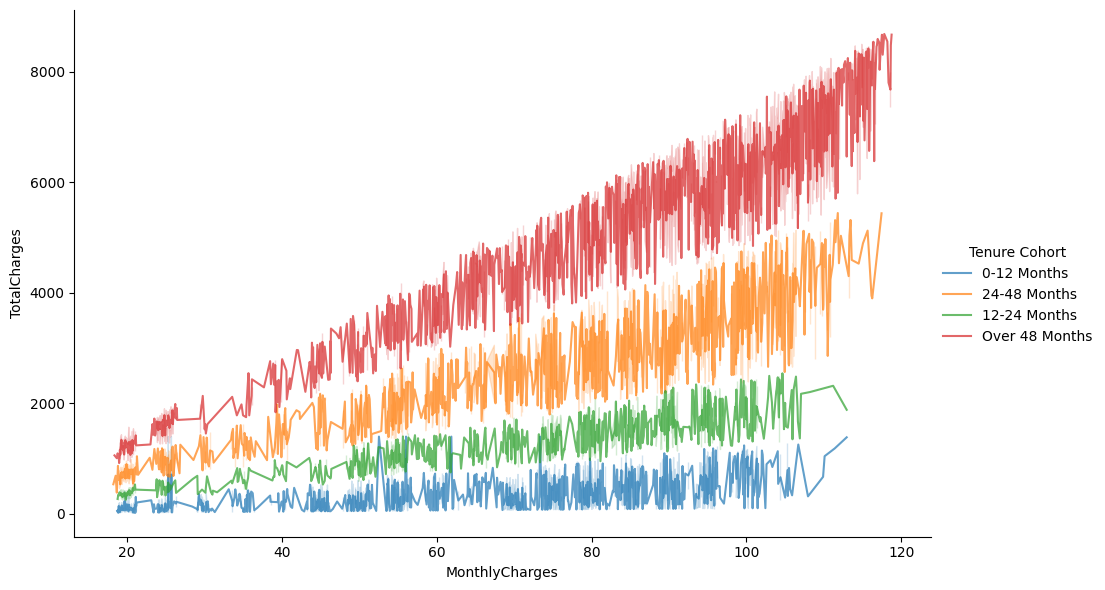

In [254]:
sns.relplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', kind='line', height=6, aspect=1.6, alpha=0.7)


<Axes: xlabel='Tenure Cohort', ylabel='TotalCharges'>

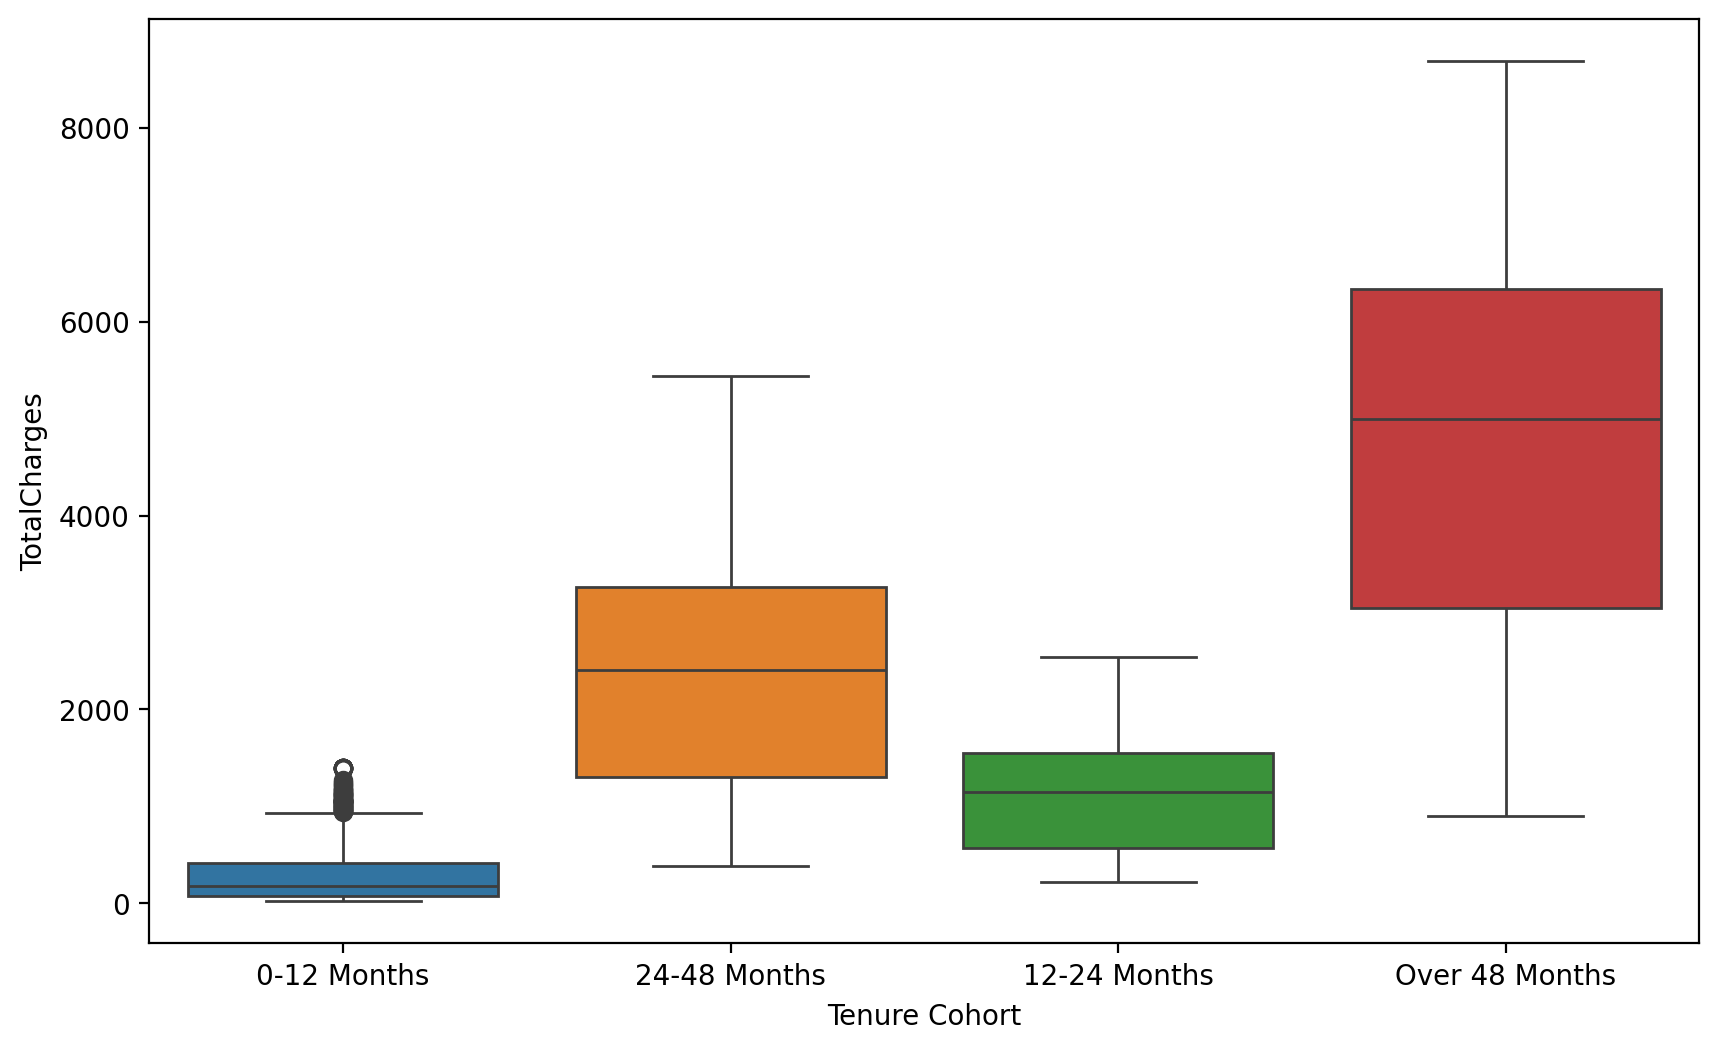

In [255]:
plt.figure(figsize=(10,6), dpi=200)
sns.boxplot(data=df, x='Tenure Cohort', y='TotalCharges', hue='Tenure Cohort')

<Axes: xlabel='Tenure Cohort', ylabel='TotalCharges'>

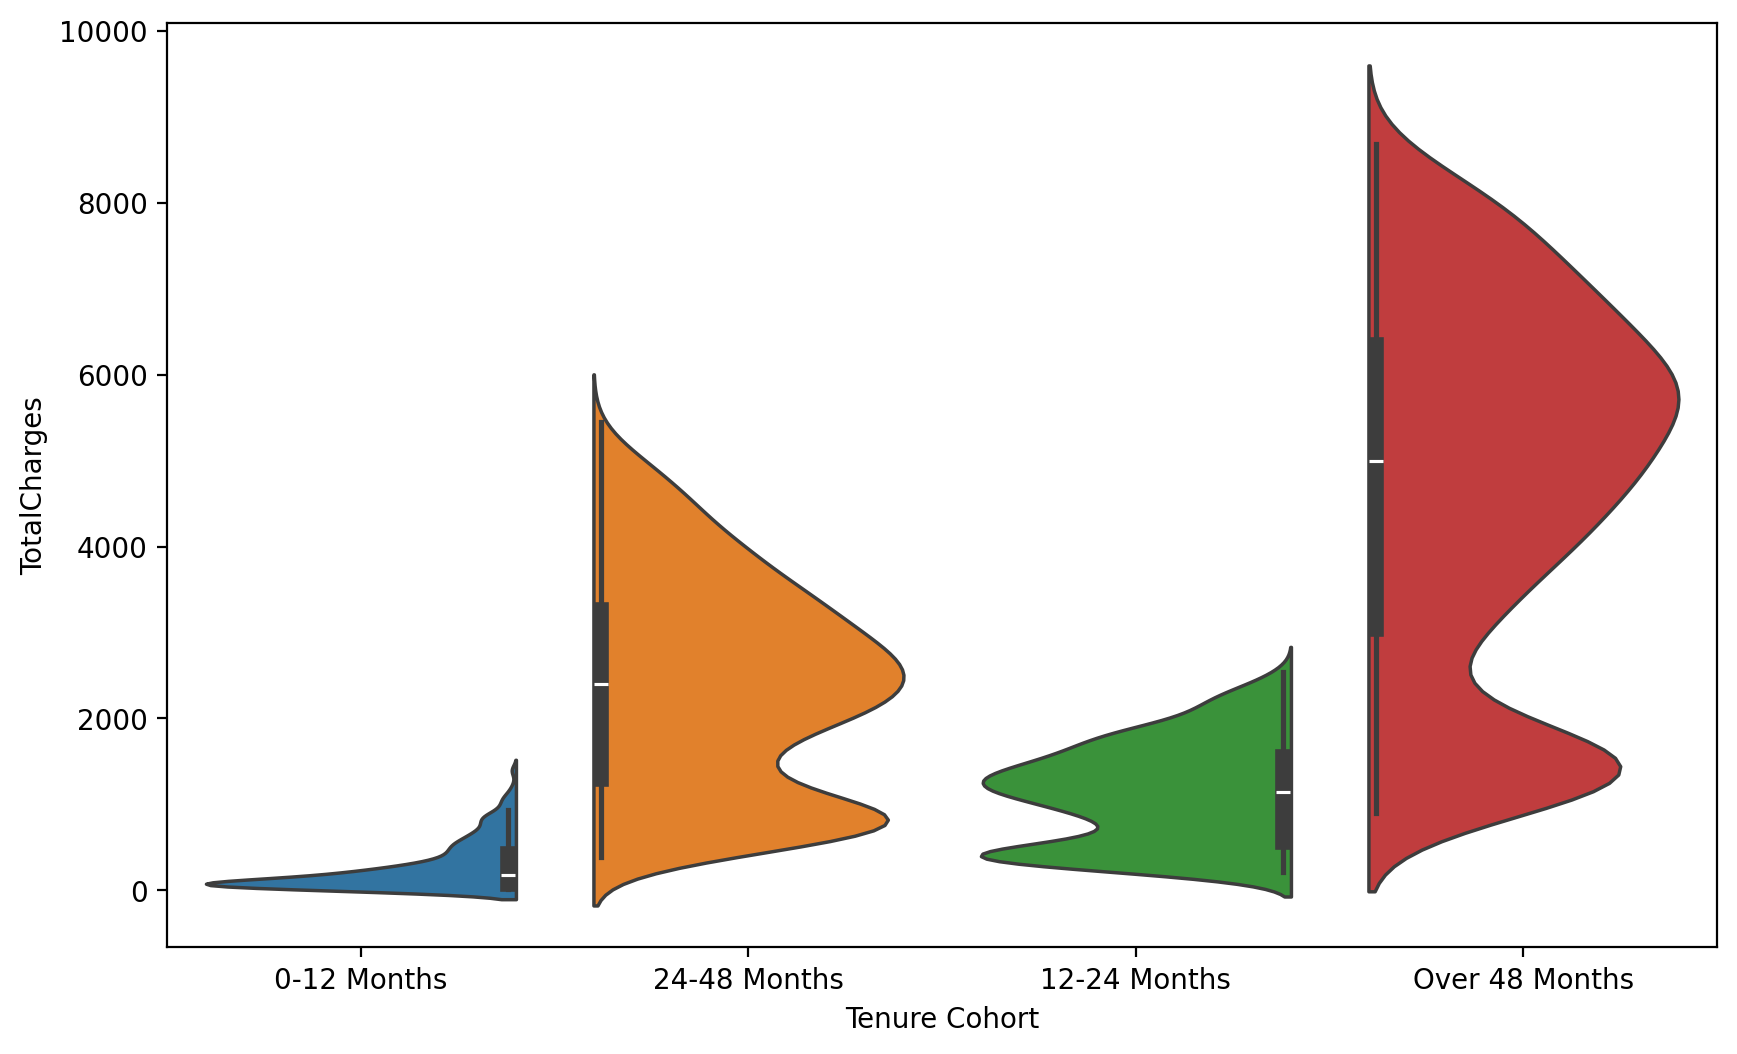

In [256]:
plt.figure(figsize=(10,6), dpi=200)
sns.violinplot(data=df, x='Tenure Cohort', y='TotalCharges', hue='Tenure Cohort', split=True)

- **This shows how the longer  customer stays, the HIGHER the total charges which is more profitable for the company.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

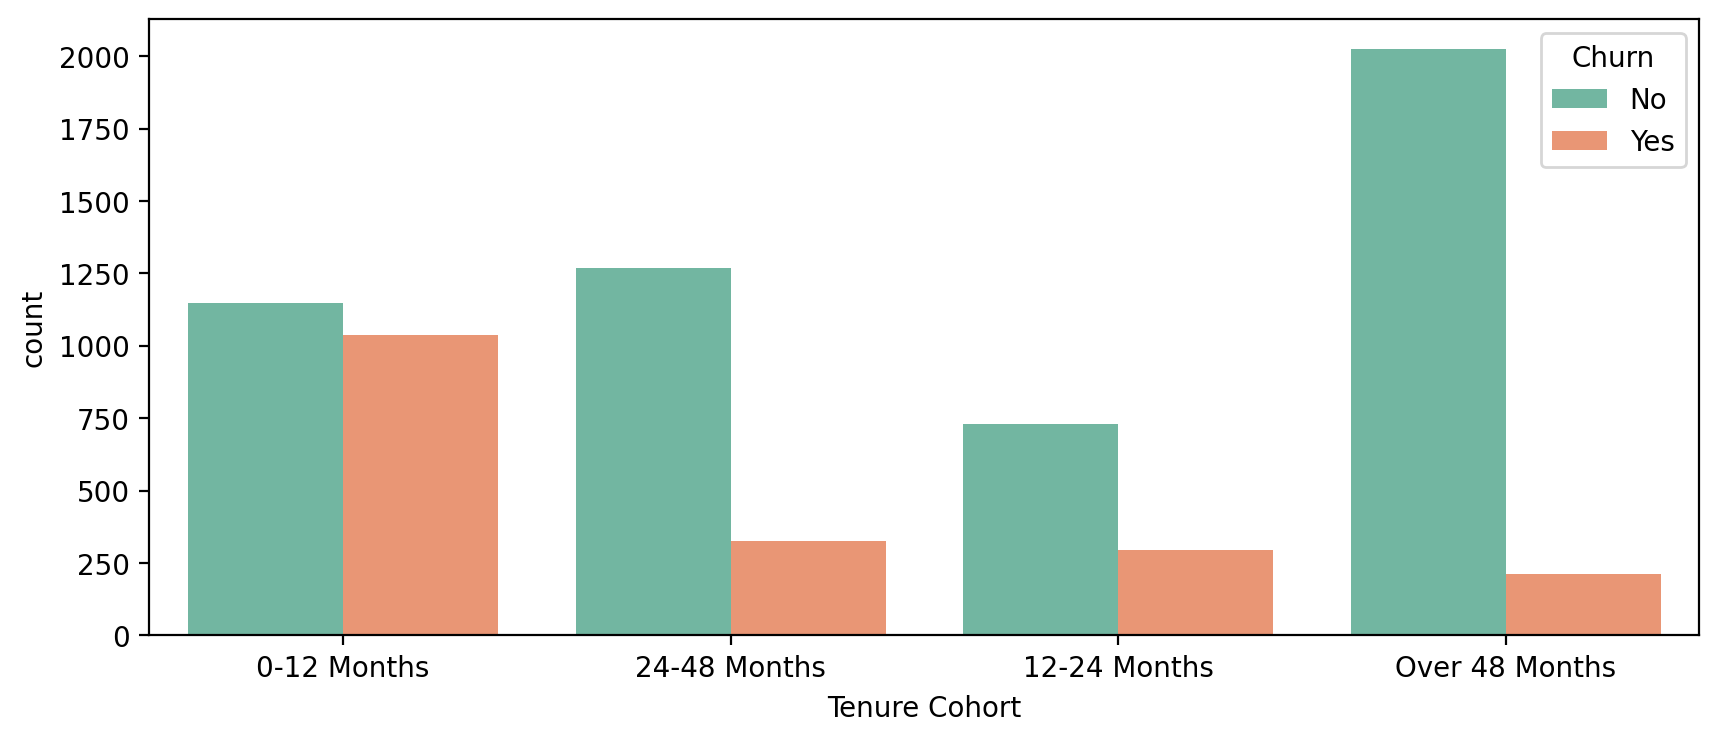

In [257]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn', palette='Set2')

- ***Demonstrates that churn rates drop significantly over time, highlighting that the company’s key focus should be on strategies to retain customers with shorter contracts and prevent early churn.***

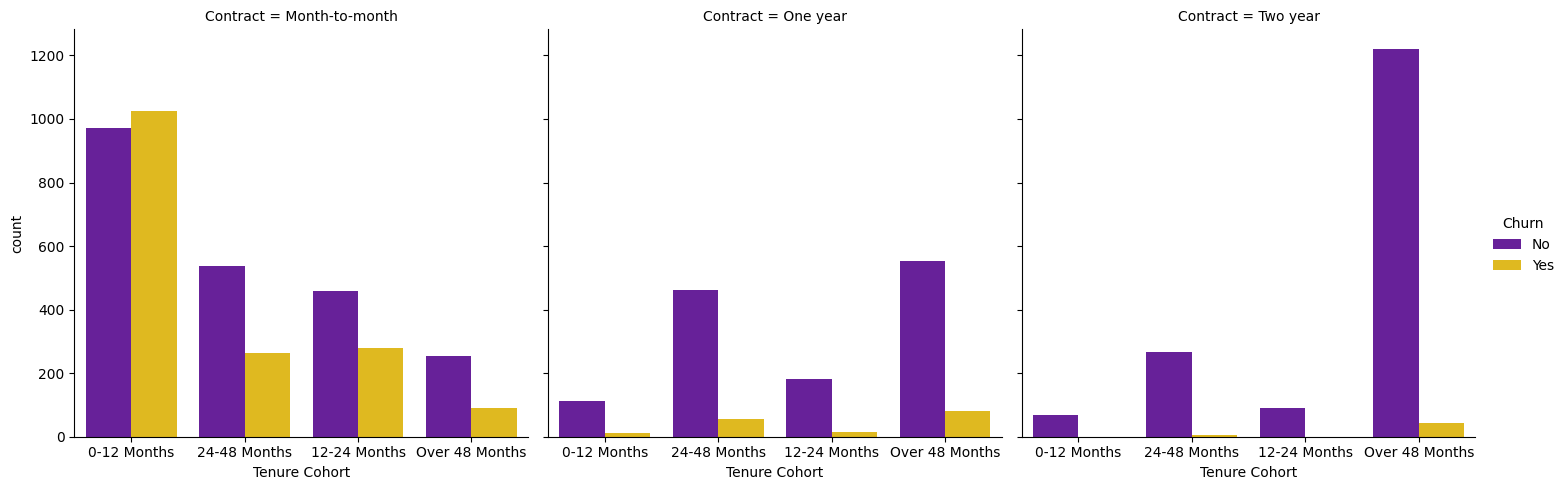

In [258]:
sns.catplot(
    data=df,
    x='Tenure Cohort',
    hue='Churn',
    kind='count',
    col='Contract',
    palette=['#6a0dad', '#ffcc00'],
    height=5,
    aspect=1
)

### CATPLOT INFERENCE:
- *Customers on month-to-month contracts are consistently more prone to churn compared to those on longer-term agreements.*
- *Those who commit to long-term contracts from the start are less likely to leave, regardless of their tenure.*
***

***
# PREDICTIVE MODELING: TREE-BASED APPROACHES IN DIFFERENT ALGORITHM
- **We will explore four tree-based algorithms: a single Decision Tree, Random Forest, AdaBoost, and Gradient Boosting.**
- **Other supervised learning methods can also be tested, such as SVM or Logistic Regression, if desired.**
***
## SINGLE DECISION TREE:

In [262]:
# df.head(2)

In [263]:
# df.tail(2)

In [264]:
# df.describe()

In [265]:
X = df.drop(['customerID','Churn'],axis=1)
y = df['Churn']

In [266]:
X = pd.get_dummies(X,drop_first=True)

- *Next, we convert all categorical columns into numeric form using pd.get_dummies.*

In [267]:
X.head(3)

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                            True              False  ...   
1                           False              False  ...   
2                           False              False  ...   

   StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                False              False              False   
1                False               True              False   
2                False              False              False   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                  True                                  False   
1                 False                                  False   
2                  True                                  False   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                            True                       False   
1                           False                        True   
2                           False                        True   

   Tenure Cohort_12-24 Months  Tenure Cohort_24-48 Months  \
0                       False                       False   
1                       False                        True   
2                       False                       False   

   Tenure Cohort_Over 48 Months  
0                         False  
1                         False  
2                         False  

[3 rows x 33 columns]

In [268]:
X.tail(4)

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
7039              0      72          103.20       7362.90        False   
7040              0      11           29.60        346.45        False   
7041              1       4           74.40        306.60         True   
7042              0      66          105.65       6844.50         True   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
7039         True            True              True   
7040         True            True             False   
7041         True           False              True   
7042        False           False              True   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
7039                           False               True  ...   
7040                            True              False  ...   
7041                           False               True  ...   
7042                           False              False  ...   

      StreamingMovies_Yes  Contract_One year  Contract_Two year  \
7039                 True               True              False   
7040                False              False              False   
7041                False              False              False   
7042                 True              False               True   

      PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
7039                  True                                   True   
7040                  True                                  False   
7041                  True                                  False   
7042                  True                                  False   

      PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
7039                           False                       False   
7040                            True                       False   
7041                           False                        True   
7042                           False                       False   

      Tenure Cohort_12-24 Months  Tenure Cohort_24-48 Months  \
7039                       False                       False   
7040                       False                       False   
7041                       False                       False   
7042                       False                       False   

      Tenure Cohort_Over 48 Months  
7039                          True  
7040                         False  
7041                         False  
7042                          True  

[4 rows x 33 columns]

In [269]:
X.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Tenure Cohort_12-24 Months               0
Tenure Cohort_24-48 Months               0
Tenure Cohort_Over 48 Months             0
dtype: int64

## DATA SPLIT: TRAIN & TEST

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## *Applying Machine Learning Algorithm*

## *Decision Tree Classifier (DecisionTreeClassifier)*

In [272]:
from sklearn.tree import DecisionTreeClassifier

In [273]:
model = DecisionTreeClassifier(max_depth=6) #if we want the best parameters, we cn always perform a GridSearch for them.

In [274]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [275]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

In [276]:
preds = model.predict(X_test)

In [277]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.82      0.88      0.85       505
         Yes       0.62      0.50      0.55       200

    accuracy                           0.77       705
   macro avg       0.72      0.69      0.70       705
weighted avg       0.76      0.77      0.76       705



## In Visualisation Form

In [282]:
# sns.heatmap(pd.DataFrame(classification_report(y_test, preds, output_dict=True)).iloc[:-1,:].T, annot=True, cmap='Blues', fmt='.2f')


## CONCLUSION:
- ### *It is performing way better on 'No Churn' data, which is understandable because we saw at the start that the data wasn't quite well balanced and it has way more data for no churn.*

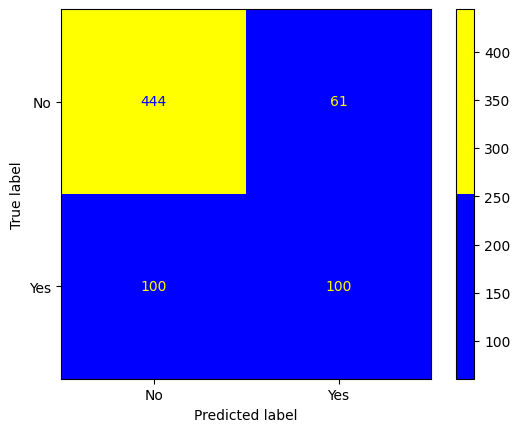

In [283]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, preds, labels=model.classes_),
    display_labels=model.classes_
).plot(cmap=ListedColormap(['Blue', 'yellow']))

plt.show()

### **This tells us how we will have 75 wrong predictions in terms of False Negatives(It is actually 'Yes' but our model predicts 'No')**
- ***We will also get 59 false positives(It is actually 'No' but our model predicts 'Yes')***
- ***We have to mainly take care of these 75 wrongly classified people because they were going to churn and the company won't be prepared to try and keep them. We should instead give them extra incentives to stay like discounts, coupons etc etc.***

In [284]:
imp_features = pd.DataFrame(data=model.feature_importances_,
                            index=X.columns, columns=['Feature Importance'])

In [285]:
imp_features = imp_features.sort_values('Feature Importance',ascending=False)

In [286]:
imp_features = imp_features[imp_features['Feature Importance']>0]

In [287]:
imp_features

Feature Importance
tenure                                          0.420105
InternetService_Fiber optic                     0.318100
TotalCharges                                    0.065959
Contract_Two year                               0.023974
MonthlyCharges                                  0.021393
StreamingTV_No internet service                 0.020333
MultipleLines_Yes                               0.020223
PaymentMethod_Electronic check                  0.019605
Contract_One year                               0.016329
DeviceProtection_No internet service            0.014278
SeniorCitizen                                   0.009792
TechSupport_Yes                                 0.009647
PaperlessBilling_Yes                            0.008868
Dependents_Yes                                  0.007014
MultipleLines_No phone service                  0.006723
StreamingTV_Yes                                 0.006390
OnlineBackup_Yes                                0.006039
PaymentMethod_Mailed check                      0.003192
gender_Male                                     0.001263
Partner_Yes                                     0.000771

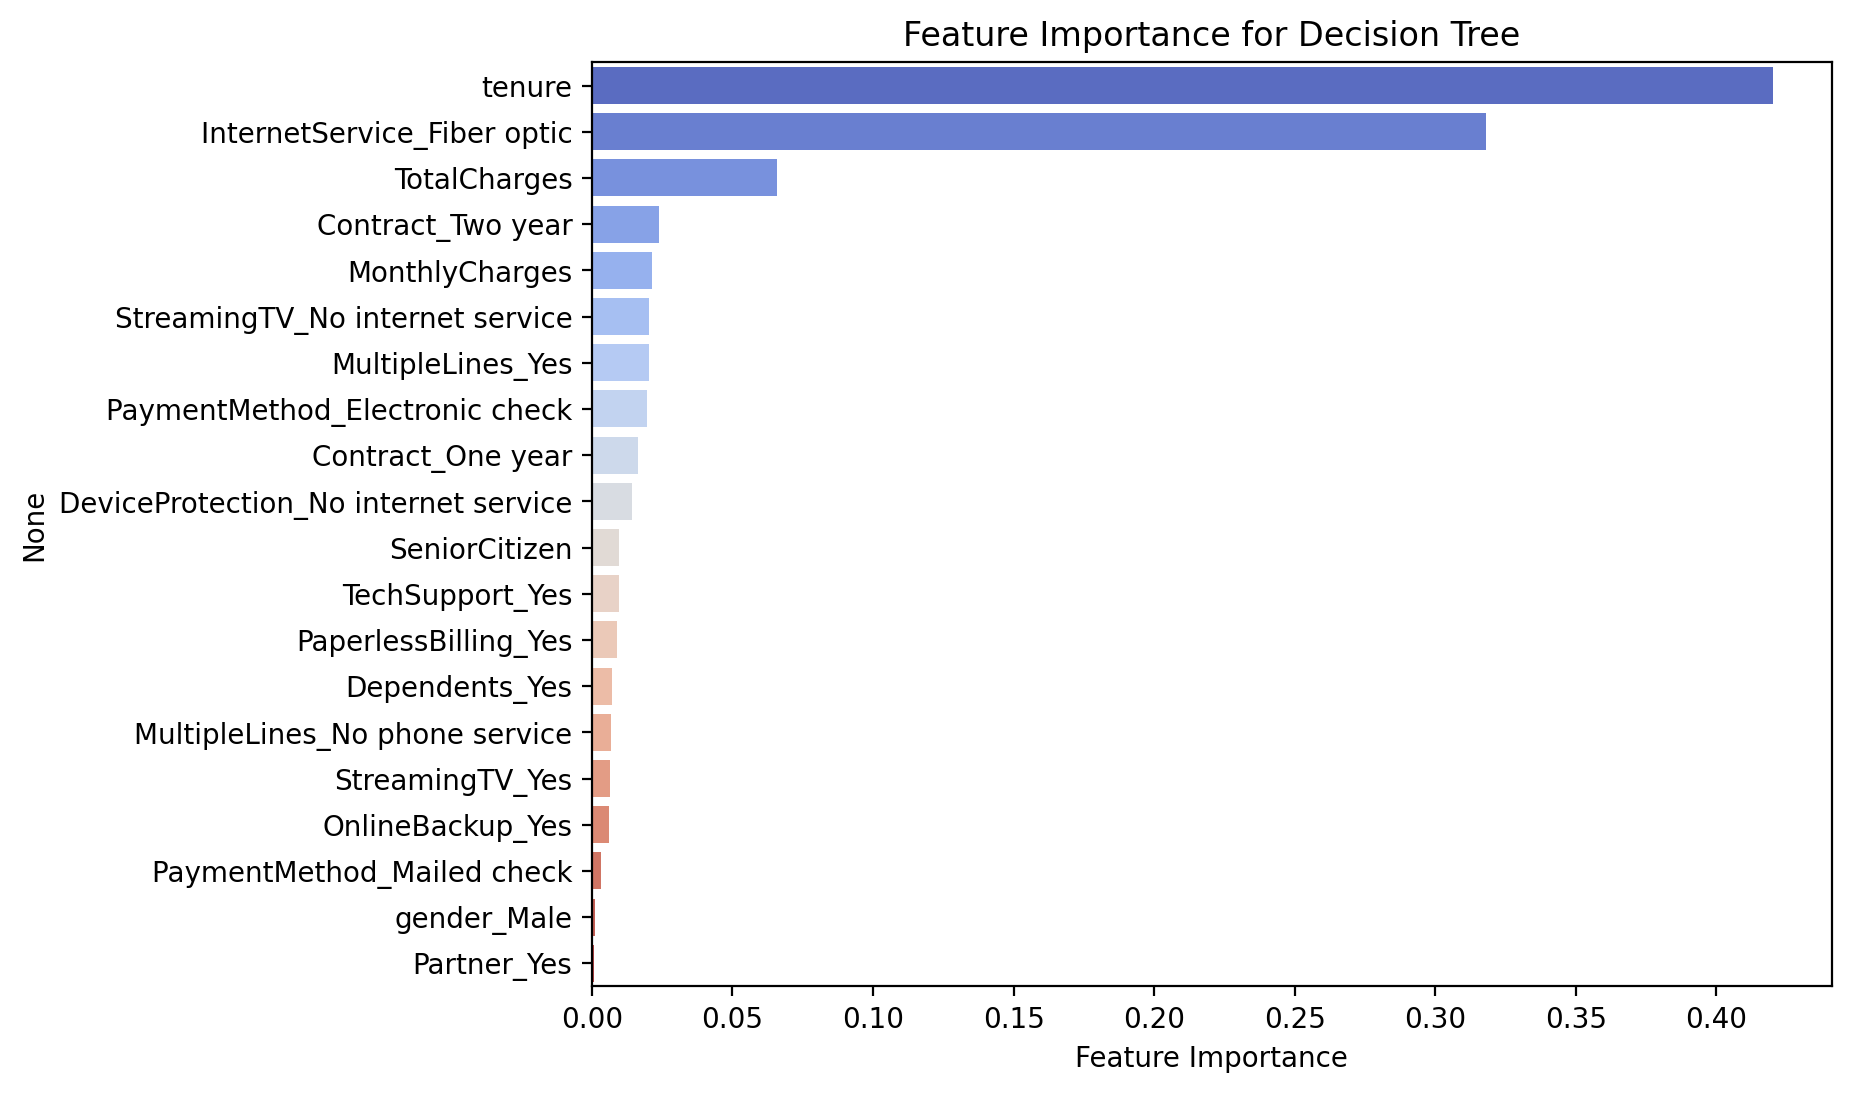

In [288]:
plt.figure(figsize=(8,6), dpi=200)
sns.barplot(x='Feature Importance', y=imp_features.index, data=imp_features, palette='coolwarm')
plt.title('Feature Importance for Decision Tree')
plt.show()

- ## *This graph tells us how we should also look into the internet service column to further identify how it affected the churn rate and what to do next.*

In [289]:
from sklearn.tree import plot_tree

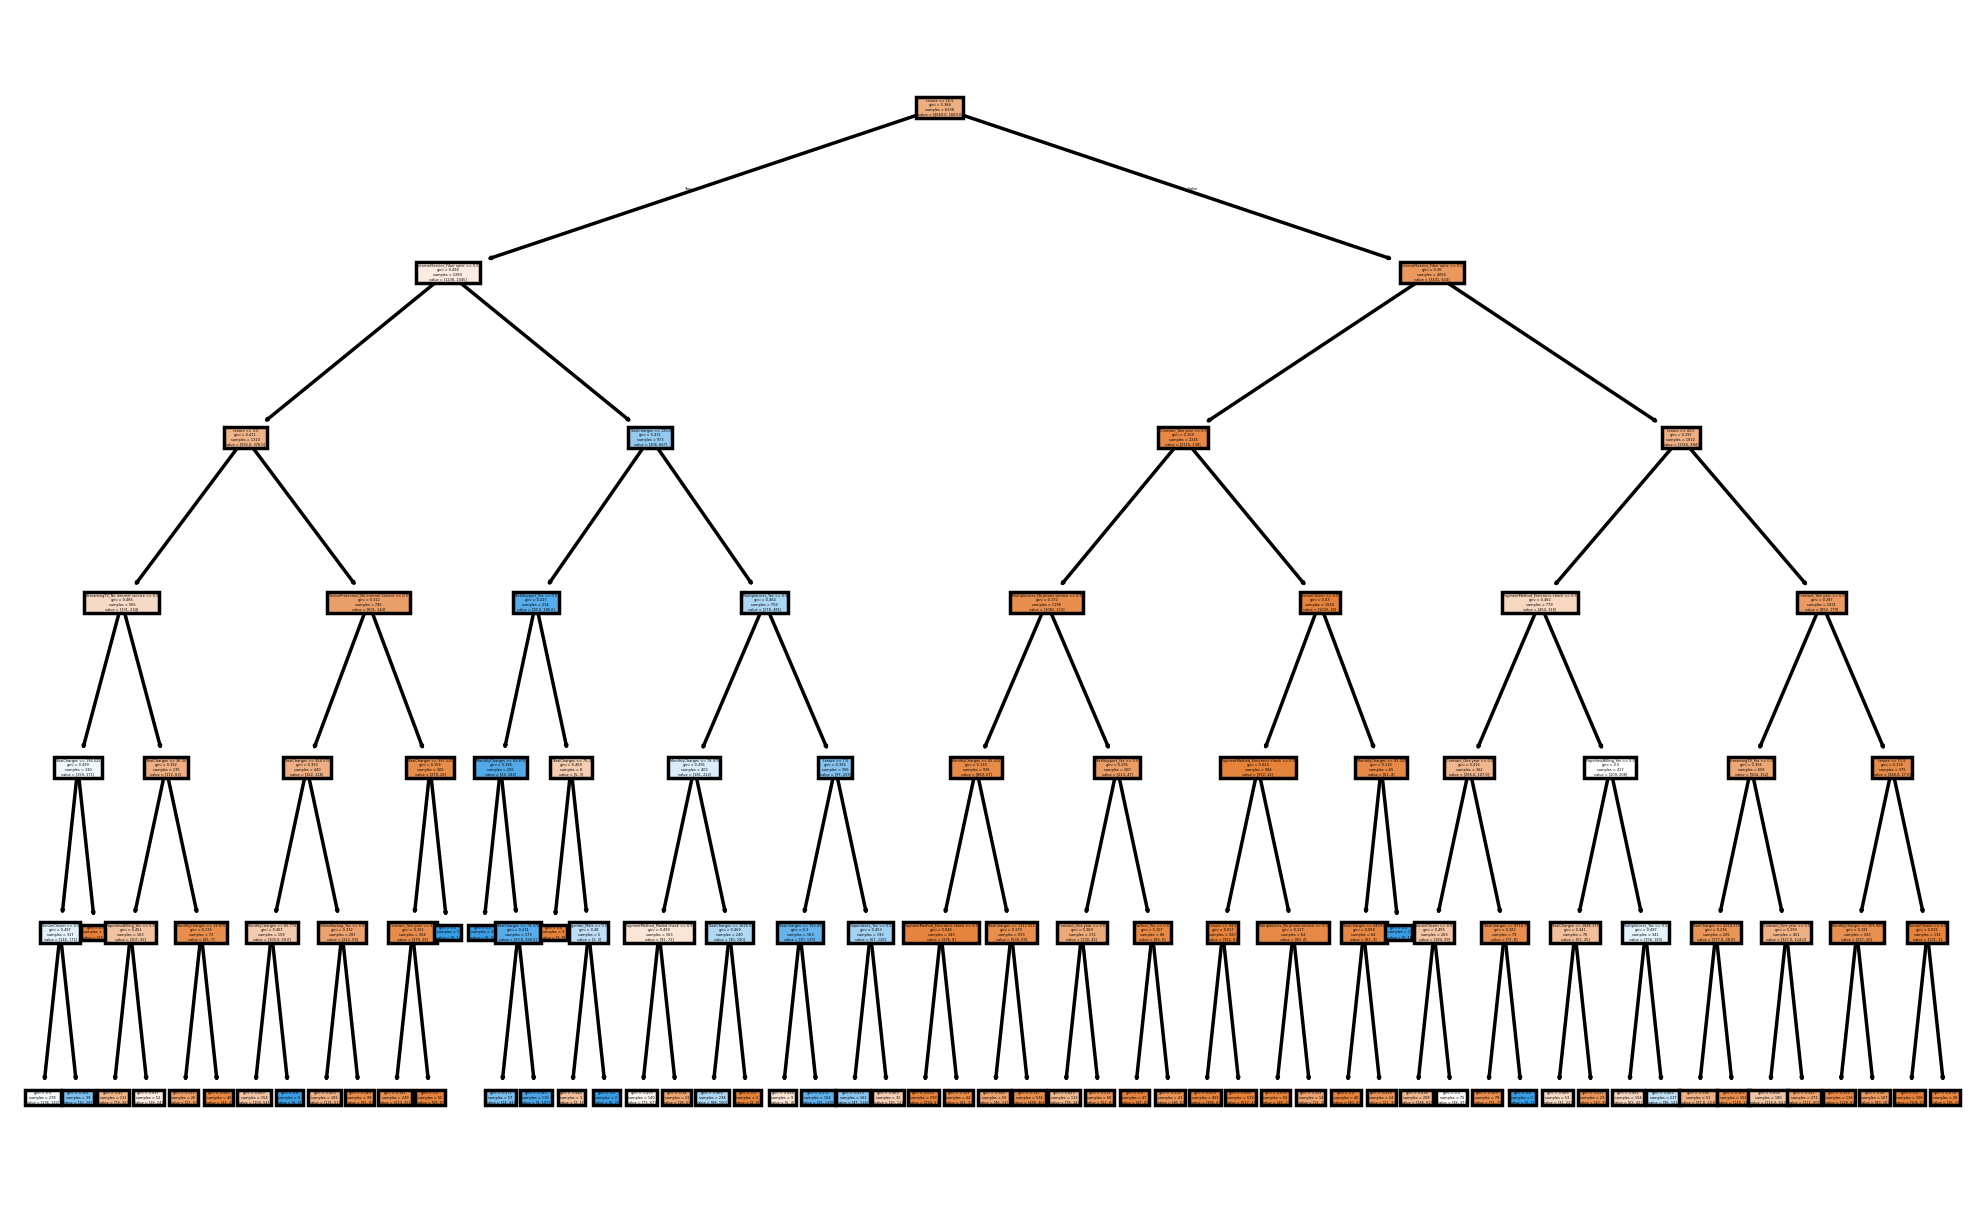

In [290]:
plt.figure(figsize=(10,6),dpi=250)
plot_tree(model,filled=True,feature_names=X.columns);

## RANDOM FOREST

In [291]:
from sklearn.ensemble import RandomForestClassifier

In [292]:
rf = RandomForestClassifier(max_depth=6)

In [293]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [294]:
rf_preds = rf.predict(X_test)

In [295]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

          No       0.80      0.91      0.85       505
         Yes       0.67      0.43      0.52       200

    accuracy                           0.78       705
   macro avg       0.73      0.67      0.69       705
weighted avg       0.76      0.78      0.76       705



<Axes: >

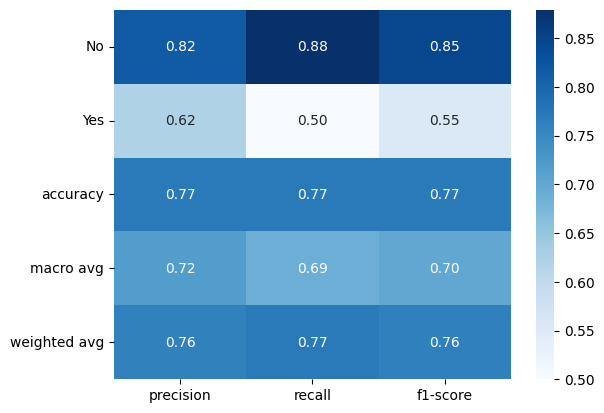

In [296]:
sns.heatmap(pd.DataFrame(classification_report(y_test, preds, output_dict=True)).iloc[:-1,:].T, annot=True, cmap='Blues', fmt='.2f')

INCREASED FROM 75 TO 80.**
- **So now we know that if we still want to go ahead with this algorithm, we should perform a GridSearch with VARIOUS parameters and implement the best parameters to the model.**

***

# BOOSTED TREES:
### WE WILL USE ADABOOST AND GRADIENT BOOSTING:

In [297]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [298]:
ada_model = AdaBoostClassifier()

In [299]:
gb_model = GradientBoostingClassifier(n_estimators=100)

In [300]:
# Train AdaBoost
ada_model.fit(X_train, y_train)

# Train Gradient Boosting
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [301]:
ada_preds = ada_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

In [ ]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.81      0.90      0.85       505
         Yes       0.65      0.48      0.55       200

    accuracy                           0.78       705
   macro avg       0.73      0.69      0.70       705
weighted avg       0.77      0.78      0.77       705



<Axes: >

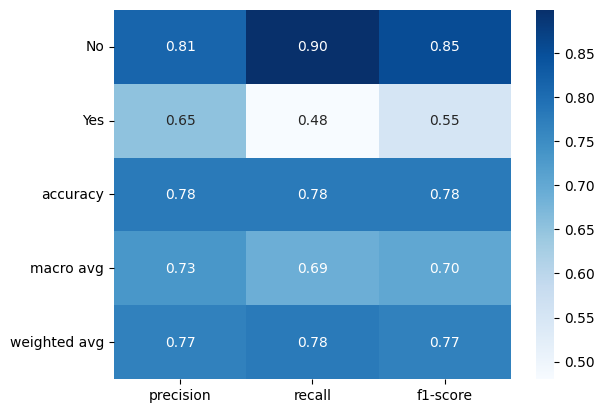

In [306]:
sns.heatmap(pd.DataFrame(classification_report(y_test, ada_preds, output_dict=True)).iloc[:-1,:].T, annot=True, cmap='Blues', fmt='.2f')

## Logistic Regression

In [303]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [304]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [305]:
lr_preds = log_reg.predict(X_test)

In [180]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



<Axes: >

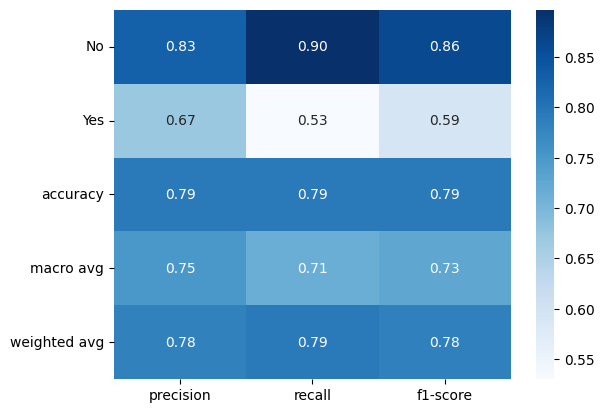

In [308]:
sns.heatmap(pd.DataFrame(classification_report(y_test, lr_preds, output_dict=True)).iloc[:-1,:].T, annot=True, cmap='Blues', fmt='.2f')

## *Random Forest Hyperparameter Tuning*

In [314]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# print("--- Starting Random Forest Hyperparameter Tuning ---")

# # 1. Define the model
# rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# # 2. Create the parameter grid
# # This dictionary holds the parameters and the values you want to test.
# # Feel free to add or change these values.
# param_grid = {
#     'n_estimators': [100, 200, 300],       # Number of trees in the forest
#     'max_depth': [10, 20, 30, None],       # Maximum depth of the tree (None means nodes expand until all leaves are pure)
#     'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required at a leaf node
# }

# # 3. Set up the GridSearchCV
# # cv=5 means 5-fold cross-validation will be used.
# # verbose=2 will print progress updates as it works.
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=5, n_jobs=-1, verbose=2)

# # 4. Fit the grid search to your training data
# # This can take some time as it's training and evaluating many models.
# grid_search.fit(X_train, y_train)

# # 5. Get the best model found by the search
# best_rf_model = grid_search.best_estimator_

# # 6. Make predictions and evaluate the best model
# best_rf_preds = best_rf_model.predict(X_test)
# best_rf_accuracy = accuracy_score(y_test, best_rf_preds)

# print(classification_report(y_test, best_rf_preds))

## *Logistic Regression Hyperparameter Tuning*

In [313]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# print("--- Starting Logistic Regression Hyperparameter Tuning ---")

# # 1. Initialize the model
# log_reg = LogisticRegression(random_state=42, max_iter=1000)

# # 2. Create the parameter grid
# # We use a list of dictionaries to test different solvers with their compatible penalties.
# param_grid = [
#     {
#         'penalty': ['l1', 'l2'],
#         'C': [0.01, 0.1, 1, 10, 100],
#         'solver': ['liblinear']  # 'liblinear' is good for smaller datasets and supports both L1/L2
#     },
#     {
#         'penalty': ['l2'],
#         'C': [0.01, 0.1, 1, 10, 100],
#         'solver': ['lbfgs'] # 'lbfgs' is another popular solver
#     }
# ]

# # 3. Set up the GridSearchCV
# # cv=5 means 5-fold cross-validation.
# # verbose=2 will print progress updates.
# log_reg_grid_search = GridSearchCV(estimator=log_reg,
#                                    param_grid=param_grid,
#                                    cv=5,
#                                    n_jobs=-1,
#                                    verbose=2)

# # 4. Fit the grid search to your training data
# log_reg_grid_search.fit(X_train, y_train)

# # 5. Get the best model found by the search
# best_log_reg_model = log_reg_grid_search.best_estimator_

# # 6. Make predictions and evaluate the best model
# best_lr_preds = best_log_reg_model.predict(X_test)
# best_lr_accuracy = accuracy_score(y_test, best_lr_preds)

# # 7. Print the results
# print("\n--- Logistic Regression Tuning Results ---")
# print("Best Parameters Found:", log_reg_grid_search.best_params_)
# print(f"Best Logistic Regression Accuracy: {best_lr_accuracy * 100:.2f}%")
# print("\nClassification Report for Best Model:")
# print(classification_report(y_test, best_lr_preds))

## *AdaBoost Classifier Hyperparameter Tuning*

In [182]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define hyperparameter grid (only valid options)
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'algorithm': ['SAMME']  # only valid option now
}

# Initialize AdaBoost
ada = AdaBoostClassifier(random_state=42)

# Grid Search
grid_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on training data
grid_ada.fit(X_train, y_train)

# Predict & evaluate
best_ada = grid_ada.best_estimator_
ada_preds = best_ada.predict(X_test)

# Print only accuracy
# print(f"AdaBoost Accuracy: {accuracy_score(y_test, ada_preds) * 100:.2f}%")
print(classification_report(y_test, ada_preds))

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1035
         1.0       0.67      0.52      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## Conclusion

From our analysis, we observe that the **AdaBoost** model tends to perform better by reducing the number of false negatives, whereas the **Gradient Boosting** model does not show a significant improvement in this regard. By experimenting with AdaBoost’s hyperparameters, particularly increasing the number of estimators, we notice a slight boost in performance, although the overall improvement is marginal. To optimize its results further, applying **GridSearchCV** is recommended.

Additionally, when comparing with **Random Forest** and **Logistic Regression**, we find that:

- **Random Forest** provides stable performance with lower variance and is effective in handling complex feature interactions.  
- **Logistic Regression** offers a simpler and interpretable model, performing reasonably well on the dataset but may not capture complex non-linear patterns like ensemble methods.  

Overall, ensemble models like **AdaBoost** and **Random Forest** show superior performance, while **Logistic Regression** remains a good baseline for comparison.
